# Modelos: Comparativas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BASE_PATH      = '..'
LIB_PATH       = f'{BASE_PATH}/lib'
DATASETS_PATH  = f'{BASE_PATH}/datasets'
METRICS_PATH   = f'{BASE_PATH}/metrics'

In [3]:
import sys
sys.path.append(LIB_PATH)

import numpy as np
import pandas as pd

import model as ml
import data.plot as pl

2023-11-04 13:38:07.235098: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-04 13:38:07.619555: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-11-04 13:38:08.000395: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-04 13:38:08.010850: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GP

<Figure size 640x480 with 0 Axes>

## Comparativa

In [4]:
summary = ml.ValidatorSummary.load_and_join([
    f'{METRICS_PATH}/knn', 
    f'{METRICS_PATH}/gmf', 
    f'{METRICS_PATH}/biased_gmf', 
    f'{METRICS_PATH}/nnmf', 
    f'{METRICS_PATH}/deep_fm',
    f'{METRICS_PATH}/stacking',
    f'{METRICS_PATH}/cb_user_profile'
])

In [5]:
summary.show()

Ordered by mAP@5(4,5):


sample      RMSE  \
predictor                                                              
DeepFM                                               249.5  0.902296   
GMF                                                  249.5  0.997810   
NNMF                                                 249.5  0.910665   
BiasedGMF                                            249.5  0.982542   
Stacking                                             249.5  0.832201   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...    99.5  1.164085   
KNNItemBasedPredictor                                 99.5  1.449717   
KNNUserBasedPredictor                                 99.5  1.154381   
UserProfileRecommender(genres, adults, year)          49.5  1.032838   

                                                     mNDCG@5  mAP@5(4,5)  \
predictor                                                                  
DeepFM                                              0.957400    0.435632   
GMF                                                 0.960687    0.430382   
NNMF                                                0.959197    0.429555   
BiasedGMF                                           0.960704    0.428800   
Stacking                                            0.966652    0.427520   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  0.955666    0.426876   
KNNItemBasedPredictor                               0.951977    0.423125   
KNNUserBasedPredictor                               0.957768    0.416697   
UserProfileRecommender(genres, adults, year)        0.957981    0.366472   

                                                    MeanUserF1.0Score@5(4,5)  \
predictor                                                                      
DeepFM                                                              0.652114   
GMF                                                                 0.652795   
NNMF                                                                0.655235   
BiasedGMF                                                           0.642334   
Stacking                                                            0.705035   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...                  0.647667   
KNNItemBasedPredictor                                               0.629701   
KNNUserBasedPredictor                                               0.598044   
UserProfileRecommender(genres, adults, year)                        0.614142   

                                                    Precision@5(4,5)  \
predictor                                                              
DeepFM                                                      0.651728   
GMF                                                         0.652843   
NNMF                                                        0.655496   
BiasedGMF                                                   0.642974   
Stacking                                                    0.704224   
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...          0.650015   
KNNItemBasedPredictor                                       0.630103   
KNNUserBasedPredictor                                       0.597237   
UserProfileRecommender(genres, adults, year)                0.617618   

                                                    Recall@5(4,5)  
predictor                                                          
DeepFM                                                   0.651914  
GMF                                                      0.652494  
NNMF                                                     0.654900  
BiasedGMF                                                0.643026  
Stacking                                                 0.704628  
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...       0.647730  
KNNItemBasedPredictor                                    0.630375  
KNNUserBasedPredictor                                    0.596613  
UserProfileRecommender(genres, adults, year)             0.612763

In [6]:
summary.show(['mAP@5(4,5)'], ['mAP@5(4,5)'])

Ordered by mAP@5(4,5):


mAP@5(4,5)
predictor                                                     
DeepFM                                                0.435632
GMF                                                   0.430382
NNMF                                                  0.429555
BiasedGMF                                             0.428800
Stacking                                              0.427520
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...    0.426876
KNNItemBasedPredictor                                 0.423125
KNNUserBasedPredictor                                 0.416697
UserProfileRecommender(genres, adults, year)          0.366472

In [7]:
summary.show(['mNDCG@5'], ['mNDCG@5'])

Ordered by mNDCG@5:


mNDCG@5
predictor                                                   
Stacking                                            0.966652
BiasedGMF                                           0.960704
GMF                                                 0.960687
NNMF                                                0.959197
UserProfileRecommender(genres, adults, year)        0.957981
KNNUserBasedPredictor                               0.957768
DeepFM                                              0.957400
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  0.955666
KNNItemBasedPredictor                               0.951977

In [8]:
summary.show(['RMSE'], ['RMSE'], ascending=True)

Ordered by RMSE:


RMSE
predictor                                                   
Stacking                                            0.832201
DeepFM                                              0.902296
NNMF                                                0.910665
BiasedGMF                                           0.982542
GMF                                                 0.997810
UserProfileRecommender(genres, adults, year)        1.032838
KNNUserBasedPredictor                               1.154381
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...  1.164085
KNNItemBasedPredictor                               1.449717

In [9]:
summary.show(['MeanUserF1.0Score@5(4,5)'], ['MeanUserF1.0Score@5(4,5)'])

Ordered by MeanUserF1.0Score@5(4,5):


MeanUserF1.0Score@5(4,5)
predictor                                                                   
Stacking                                                            0.705035
NNMF                                                                0.655235
GMF                                                                 0.652795
DeepFM                                                              0.652114
Ensemple[KNNUserBasedPredictor, KNNItemBasedPre...                  0.647667
BiasedGMF                                                           0.642334
KNNItemBasedPredictor                                               0.629701
UserProfileRecommender(genres, adults, year)                        0.614142
KNNUserBasedPredictor                                               0.598044

In [10]:
from IPython.display import Latex
Latex(summary.to_latex())

Ordered by mAP@5(4,5):


<IPython.core.display.Latex object>

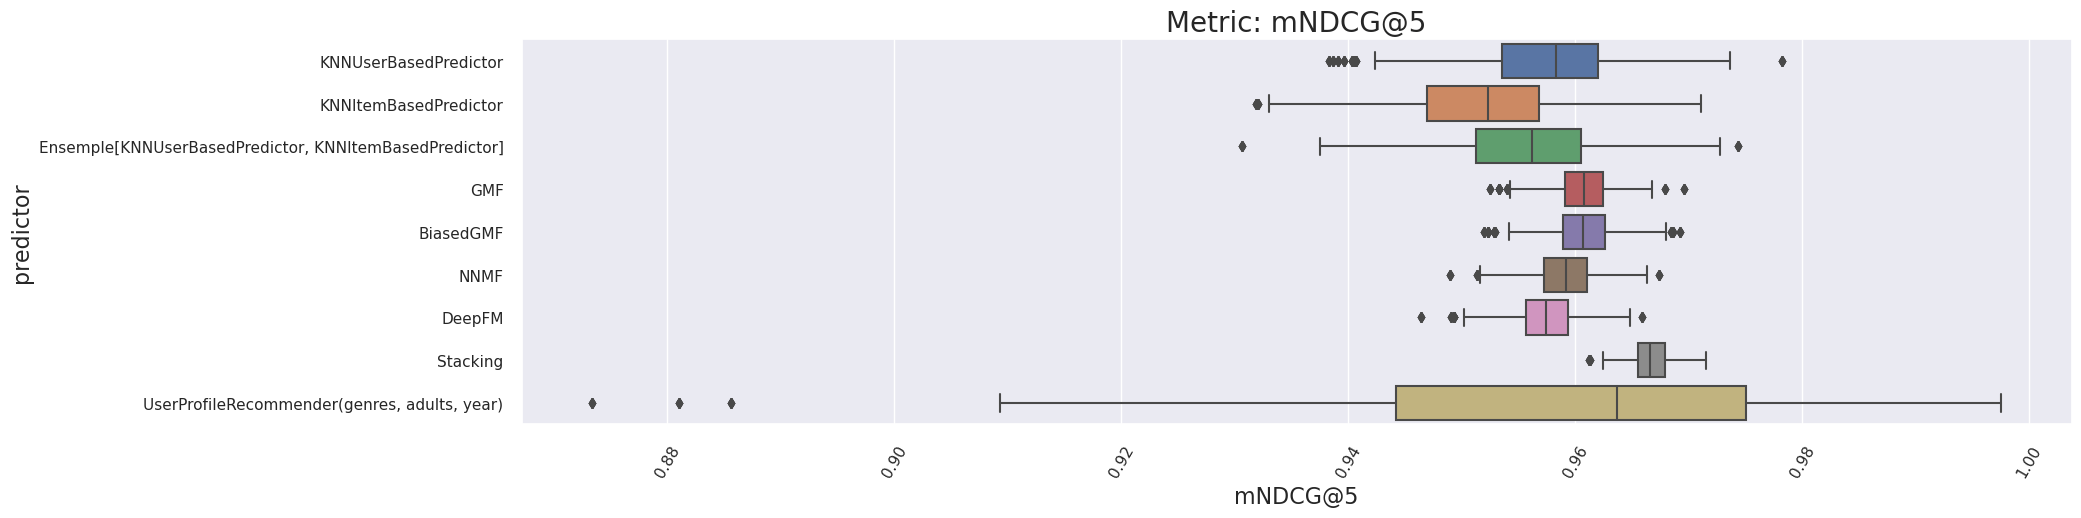

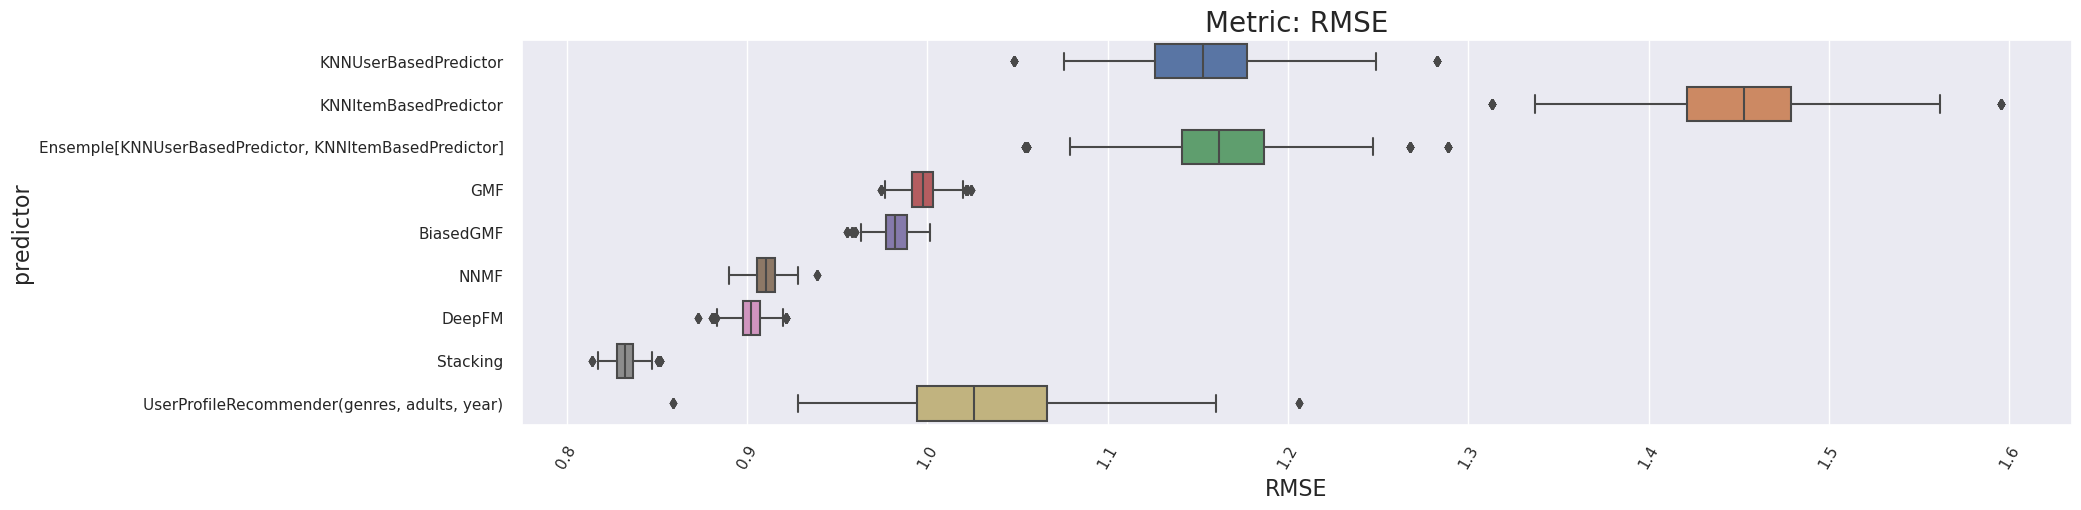

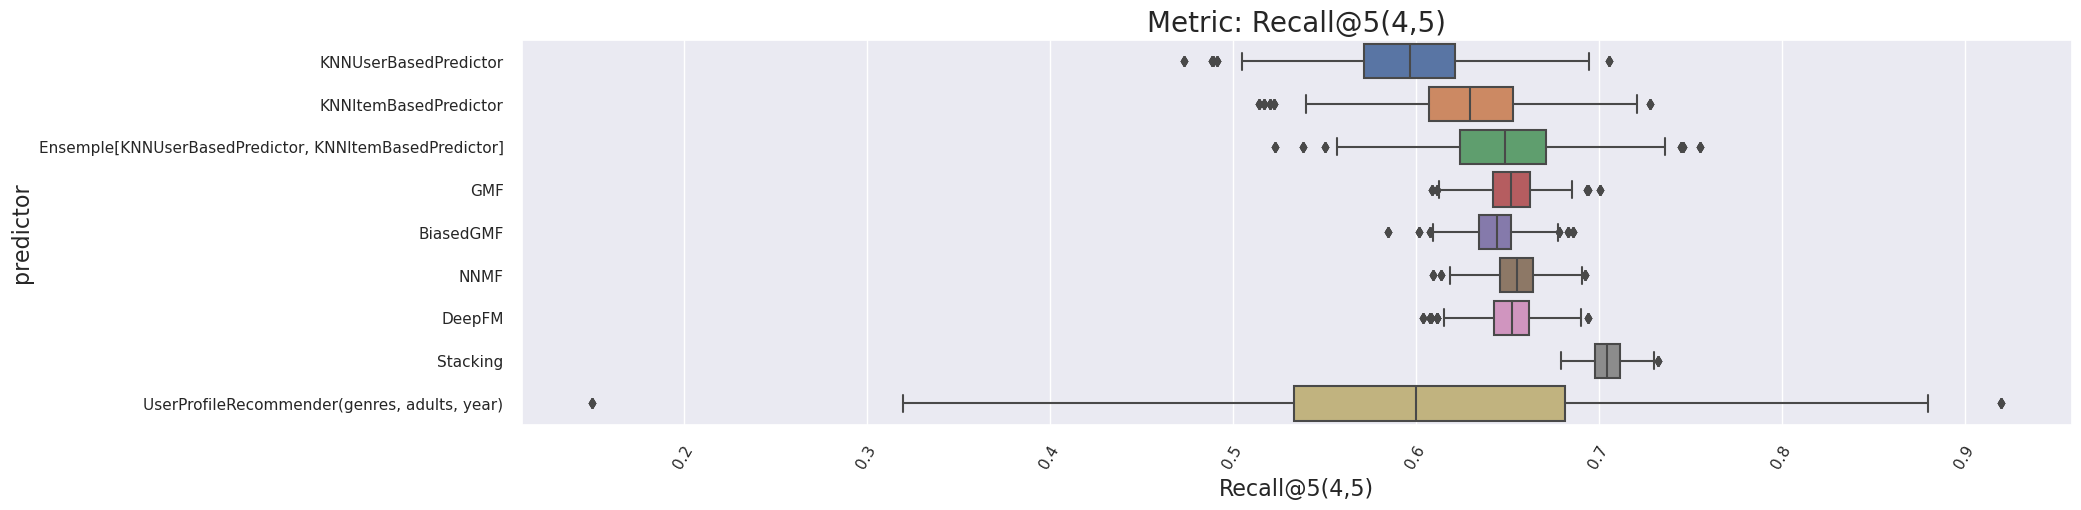

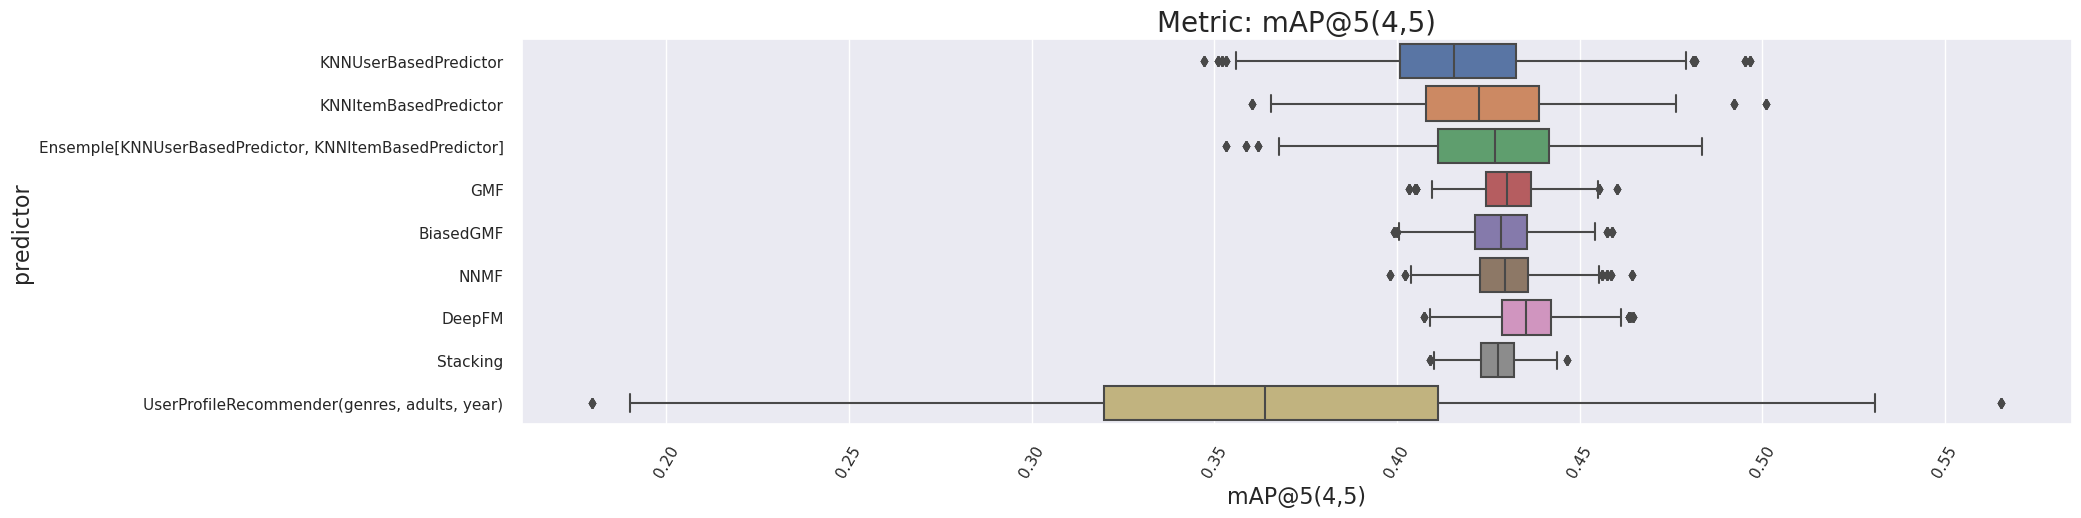

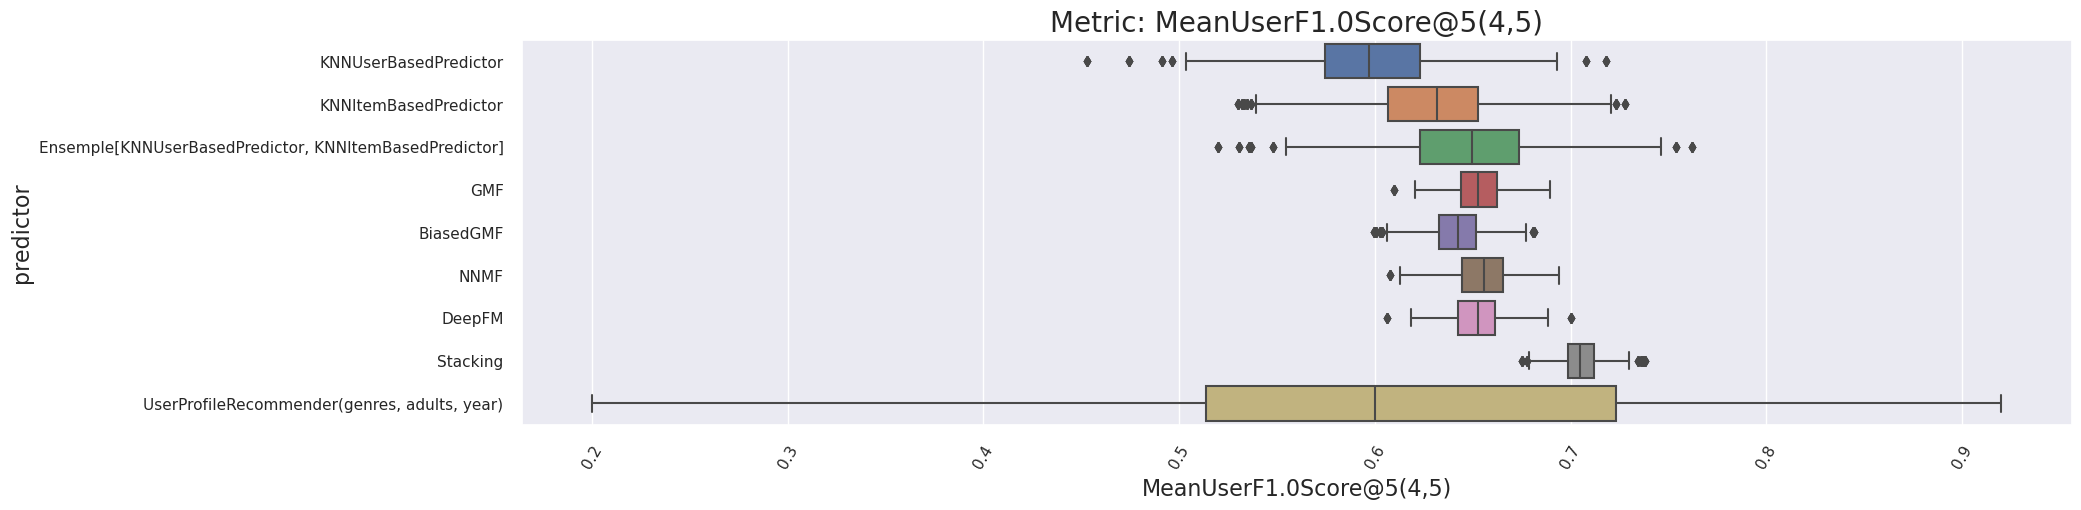

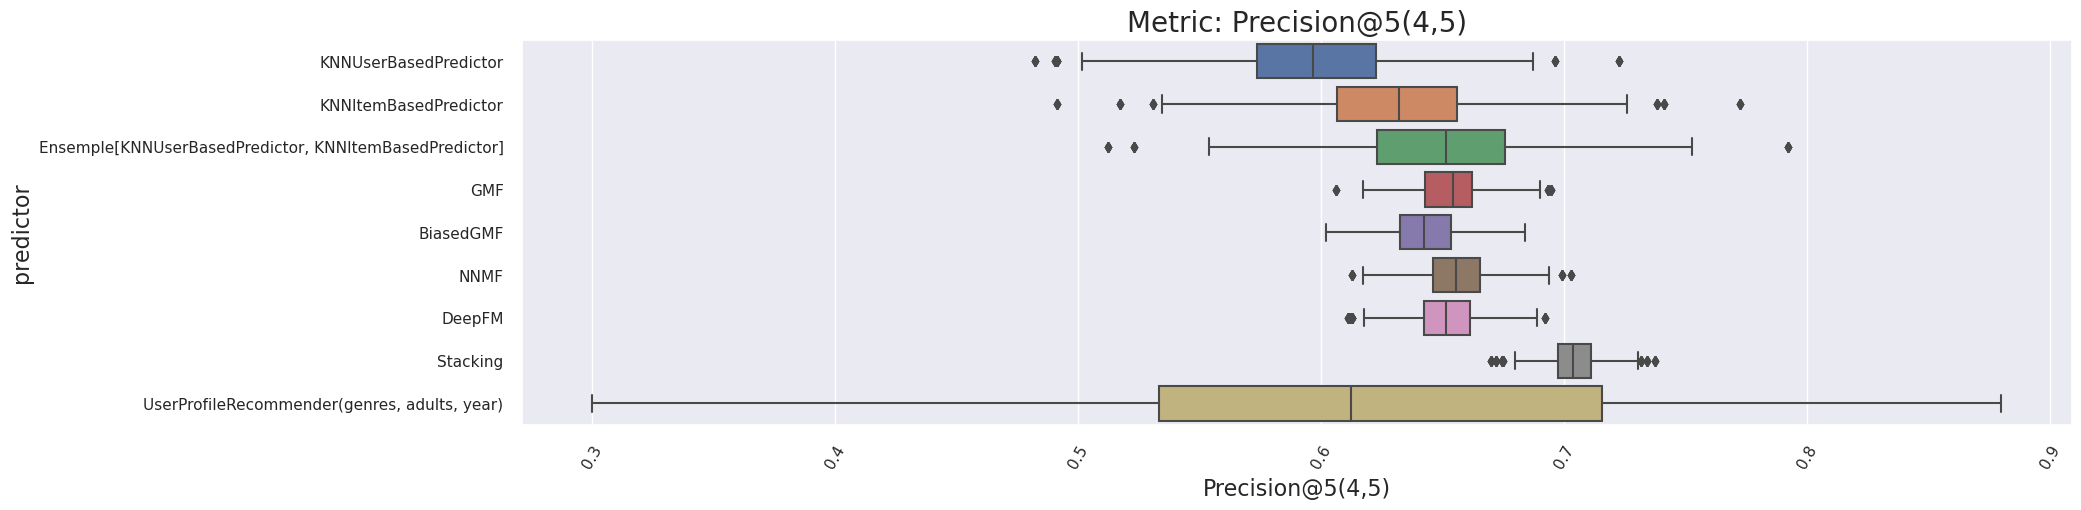

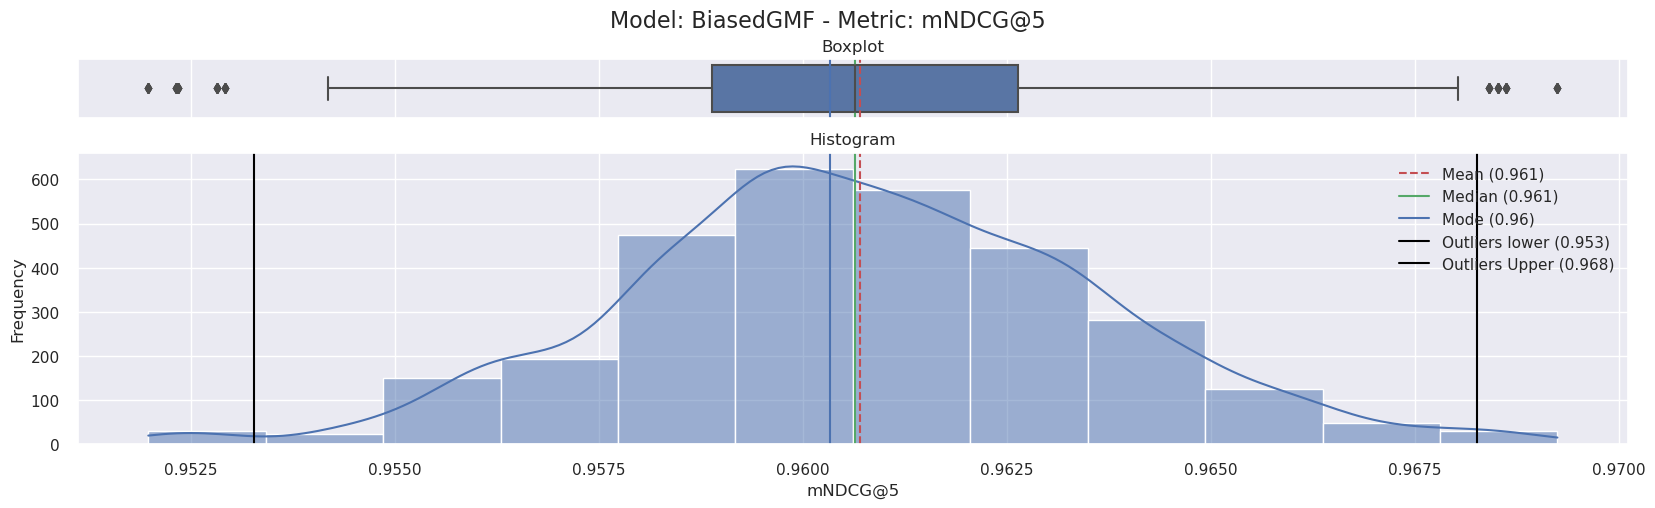

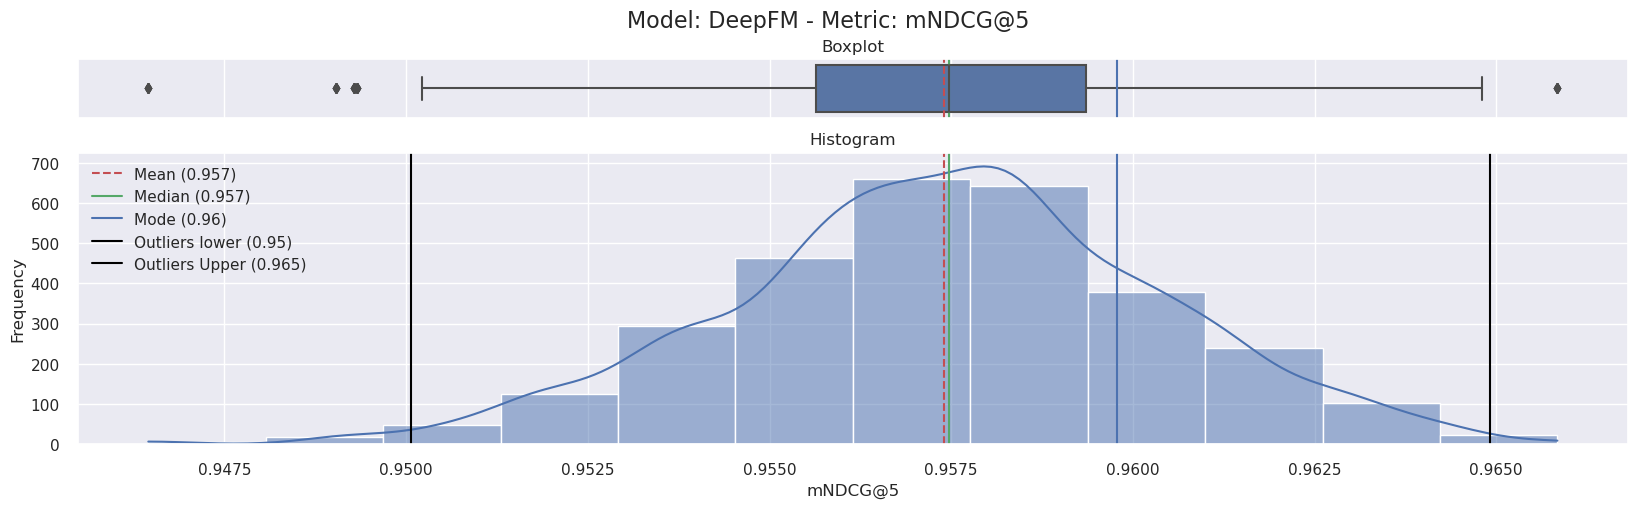

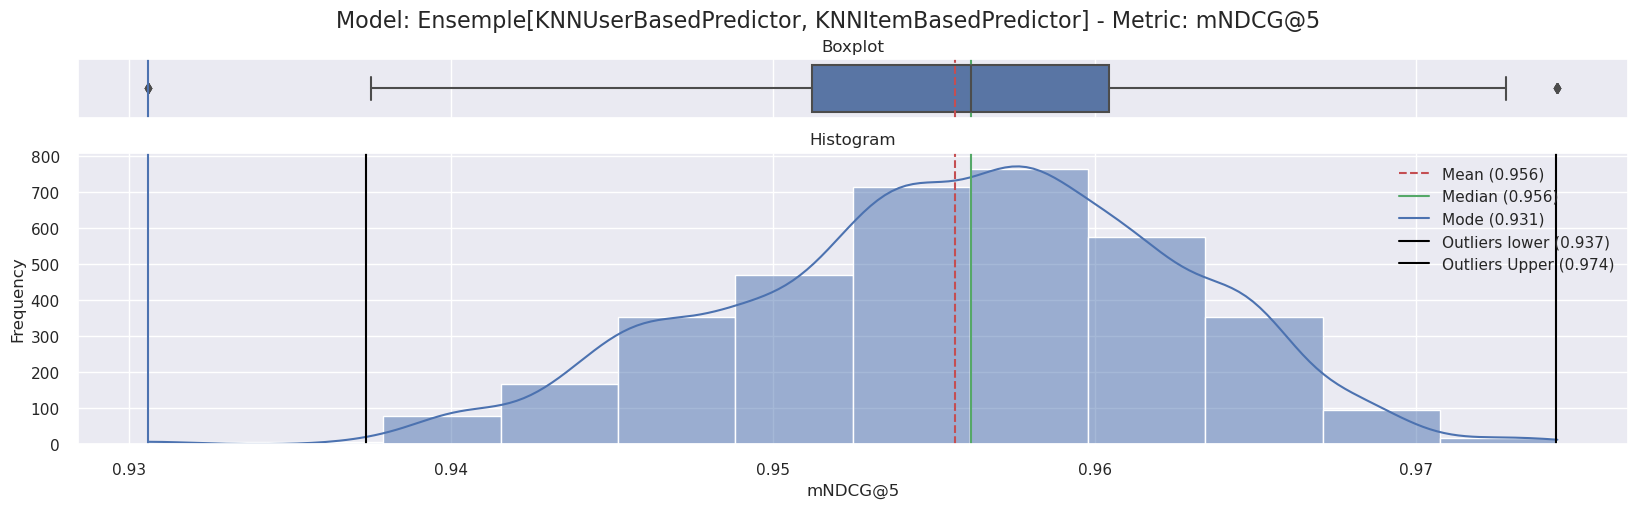

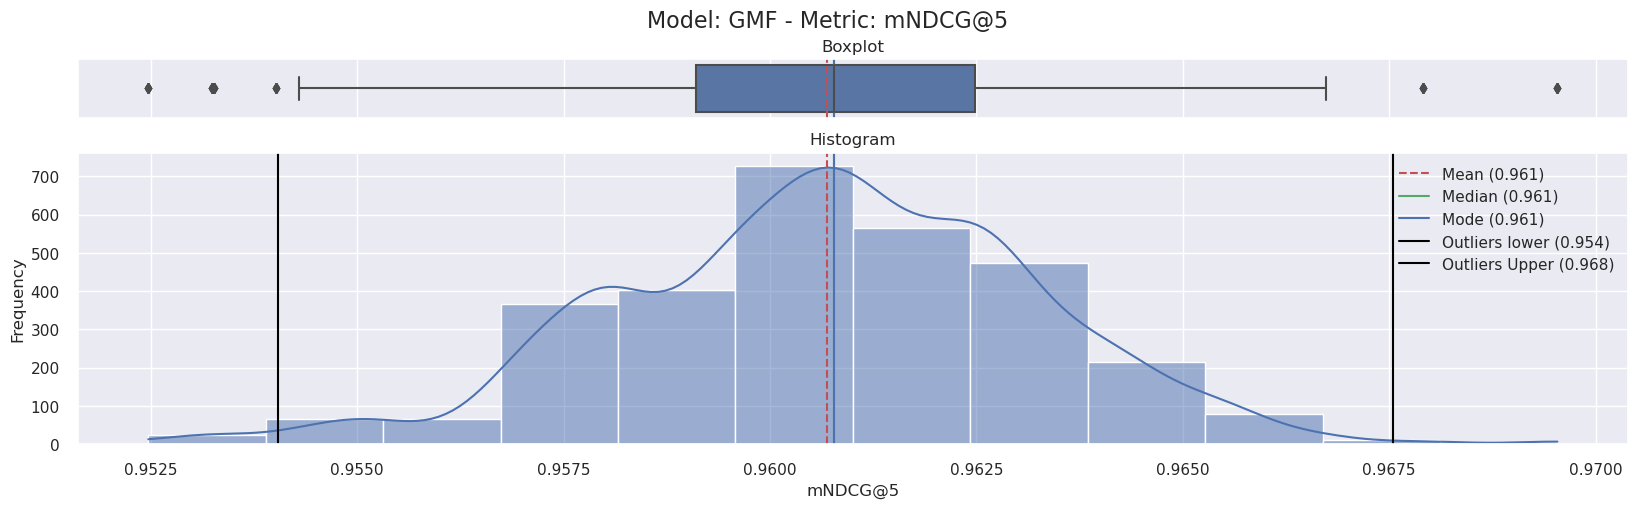

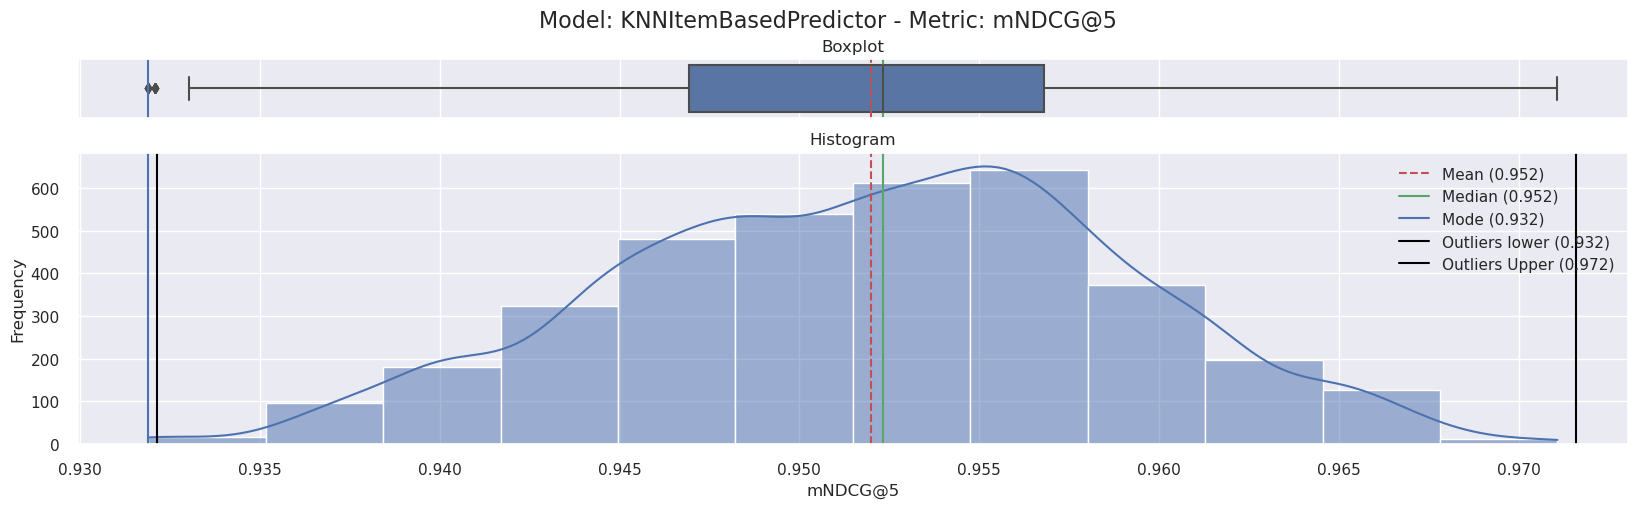

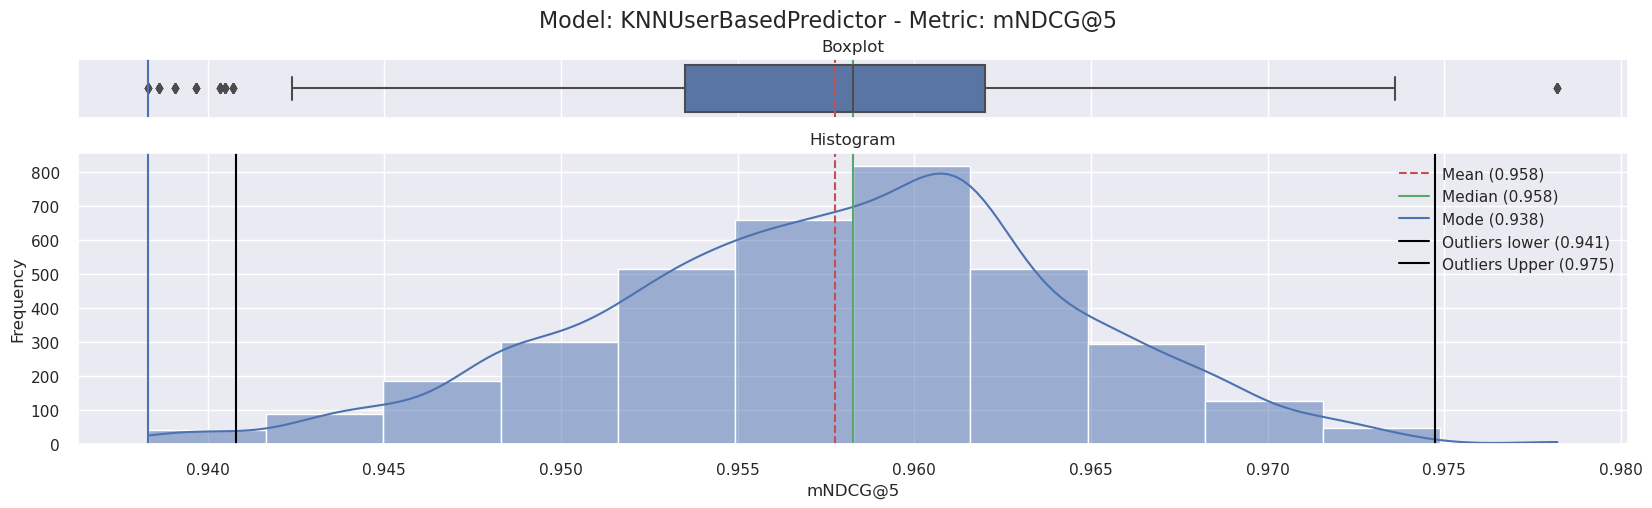

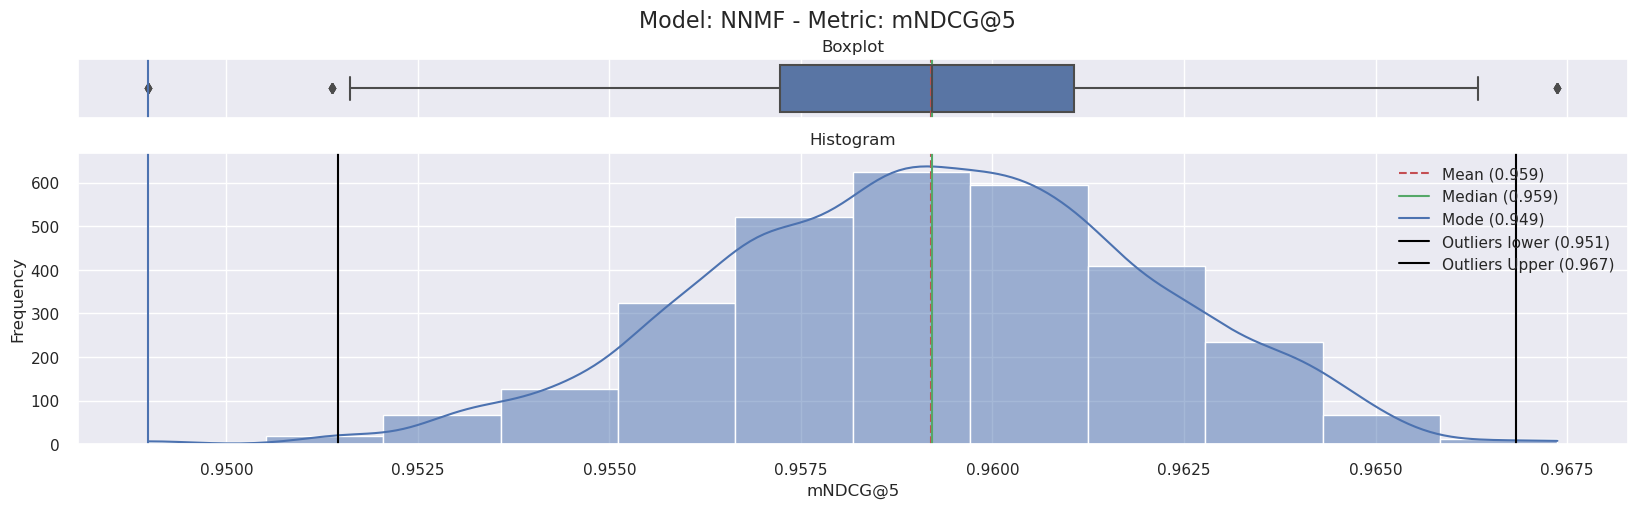

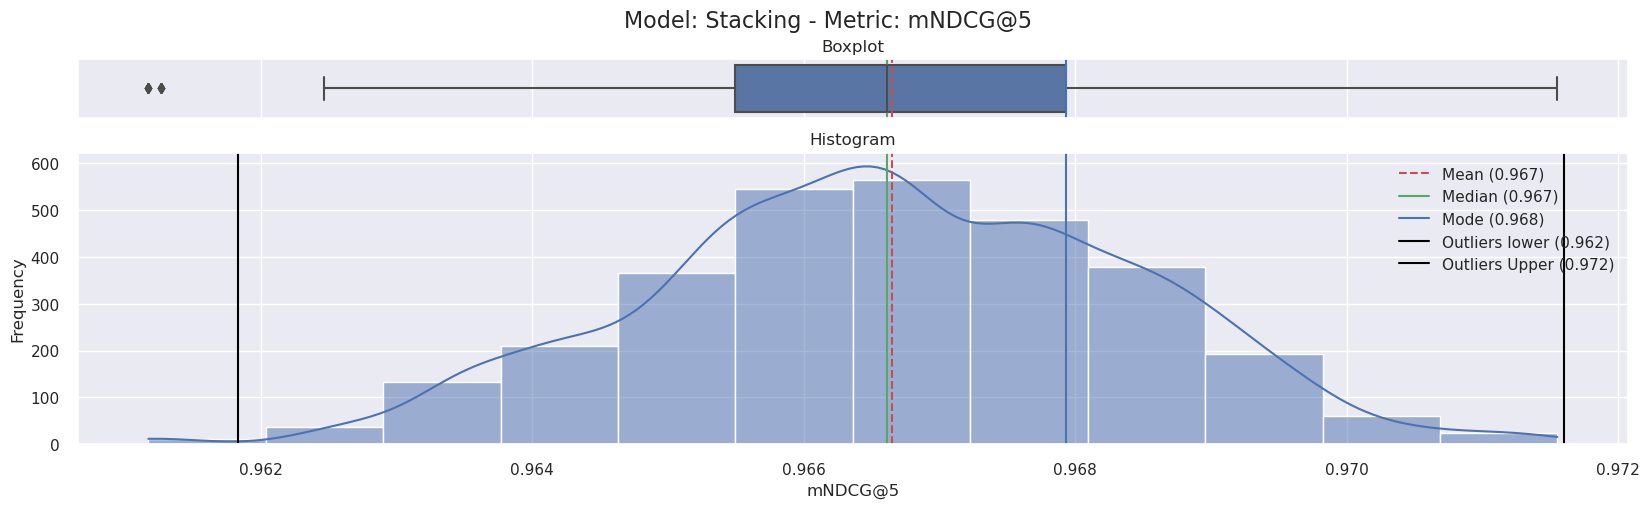

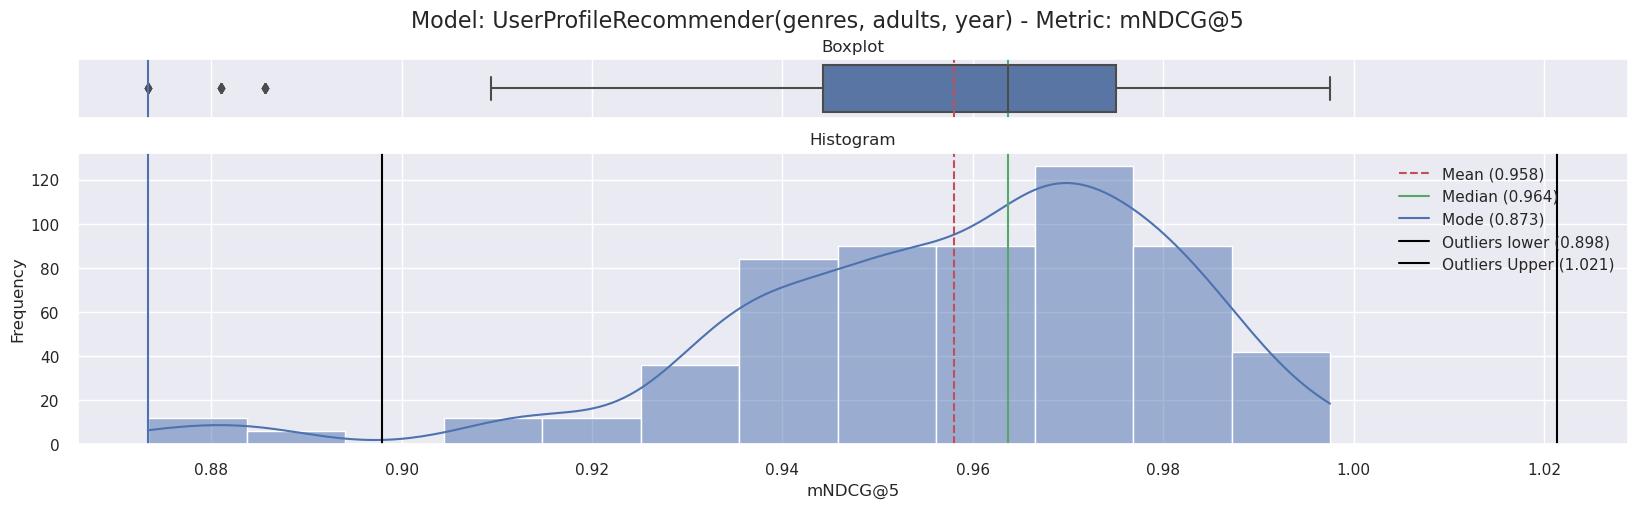

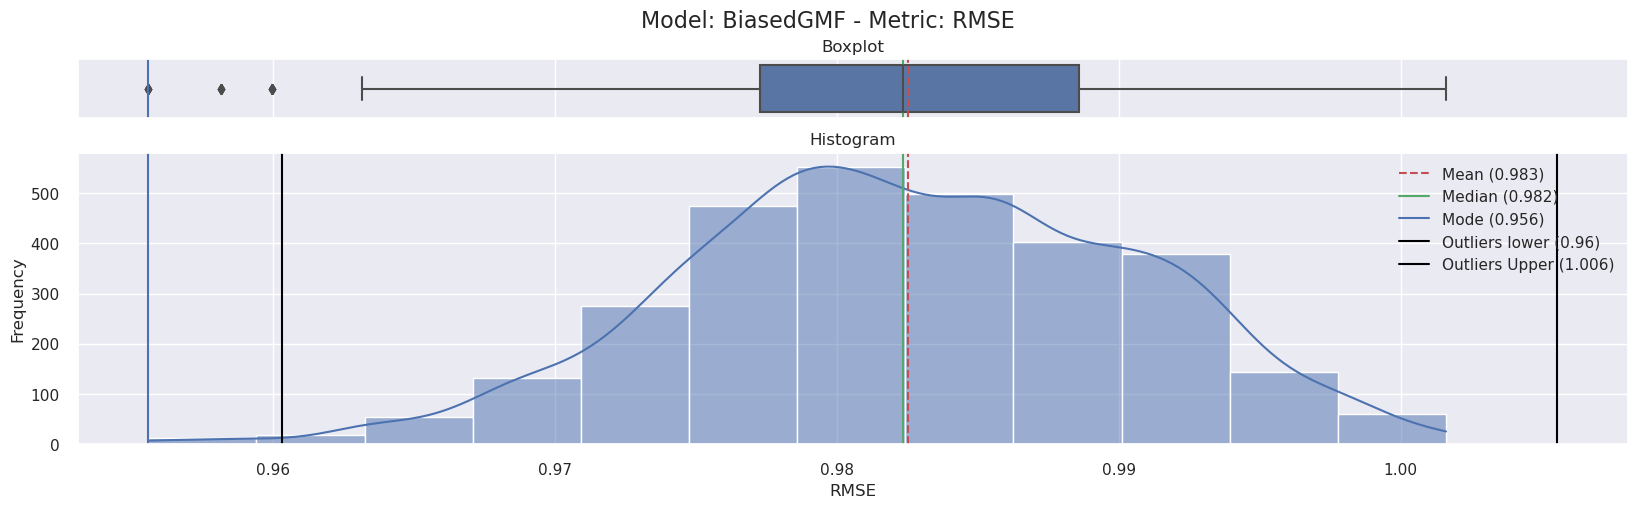

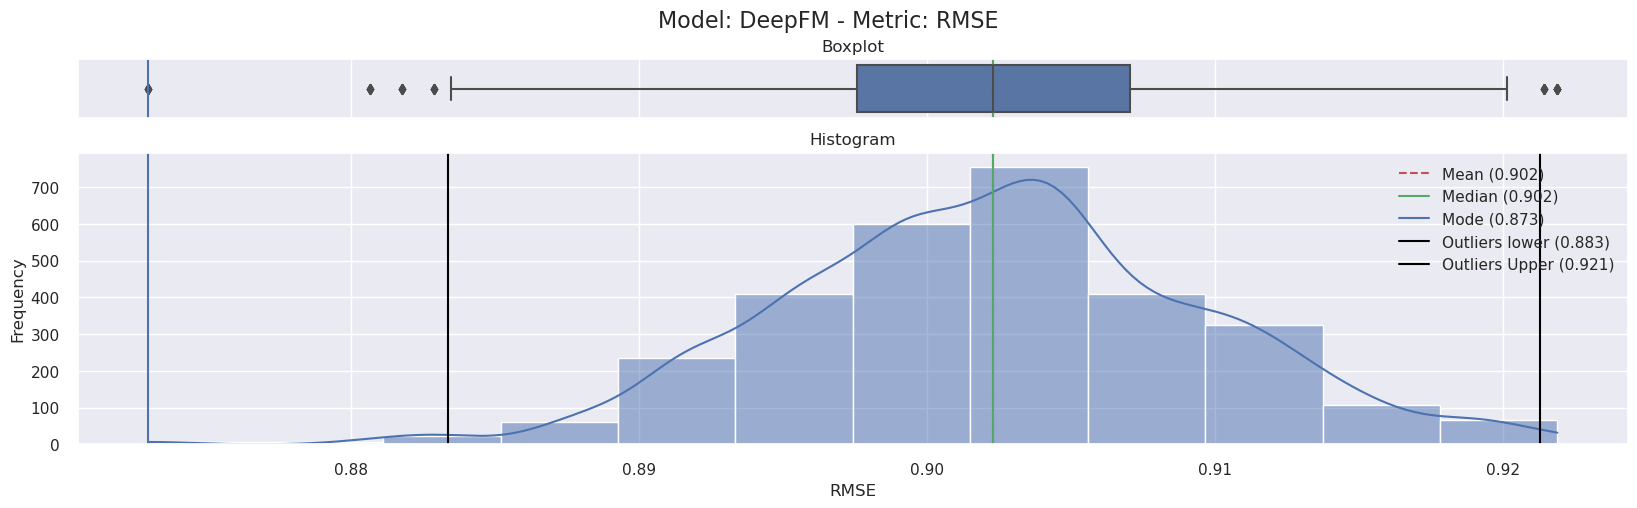

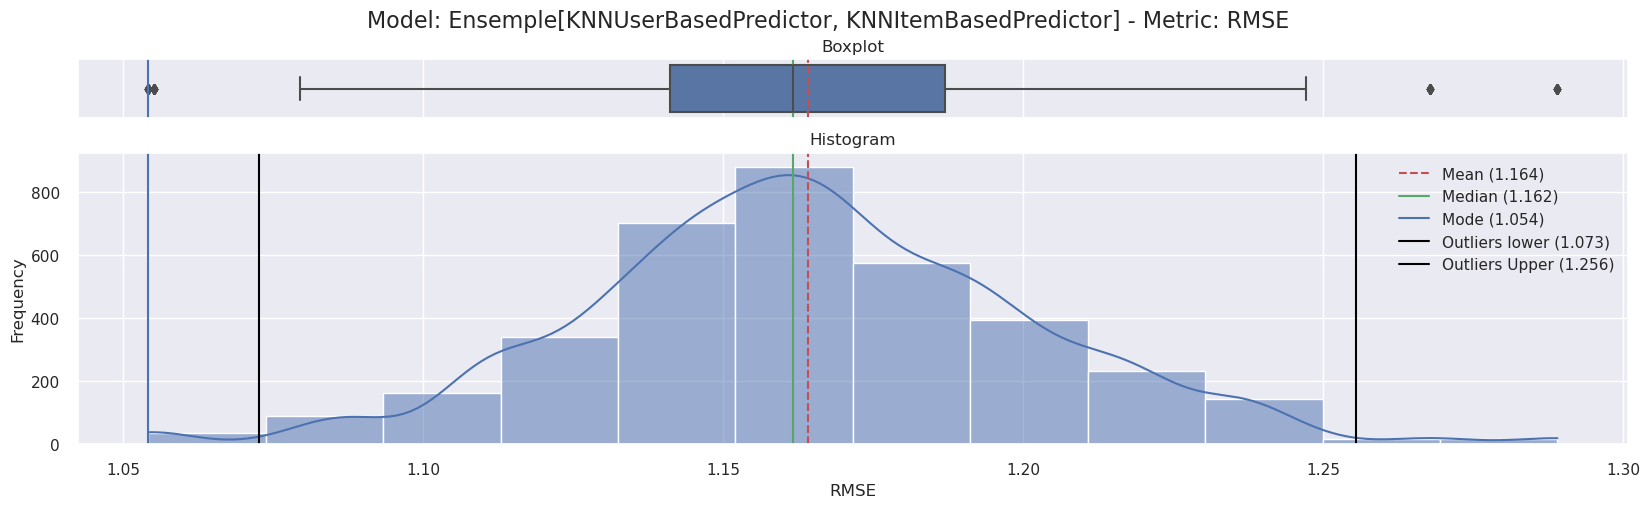

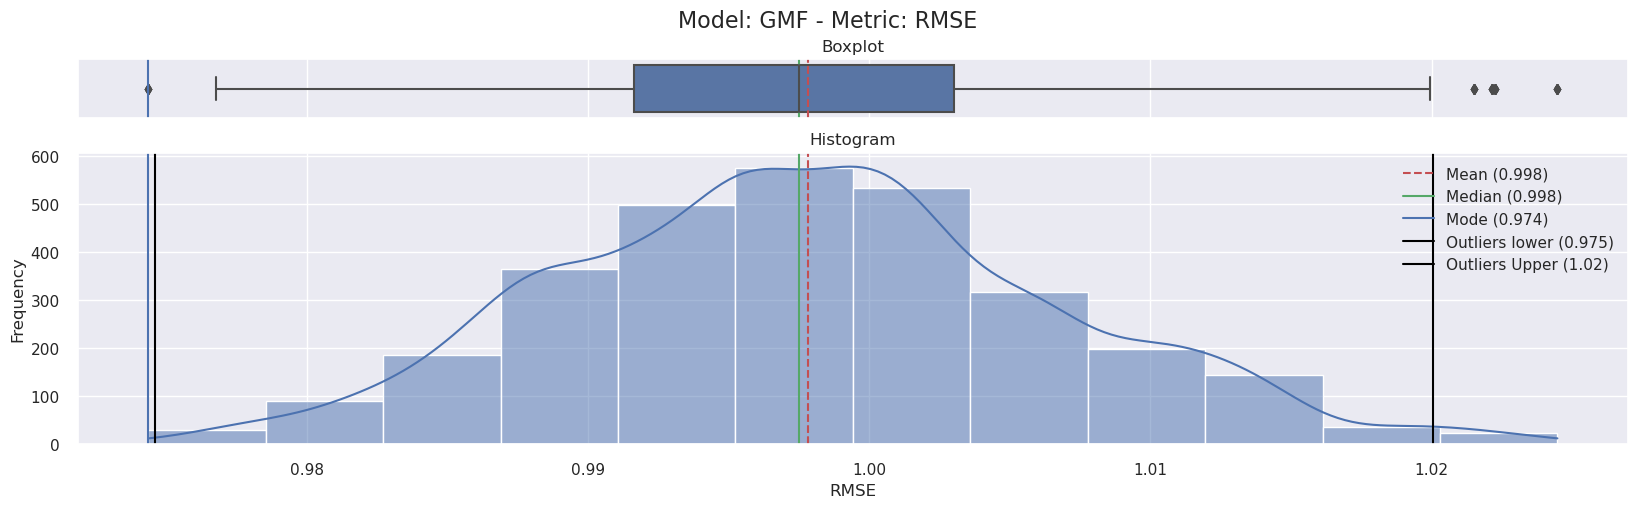

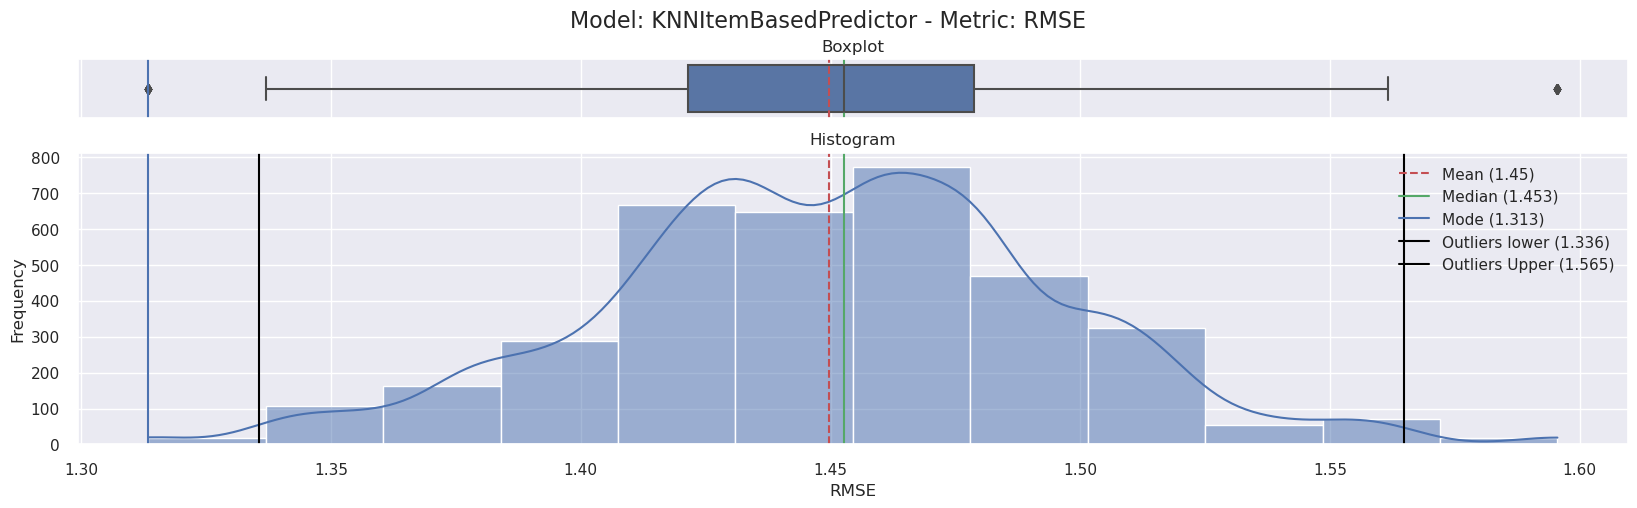

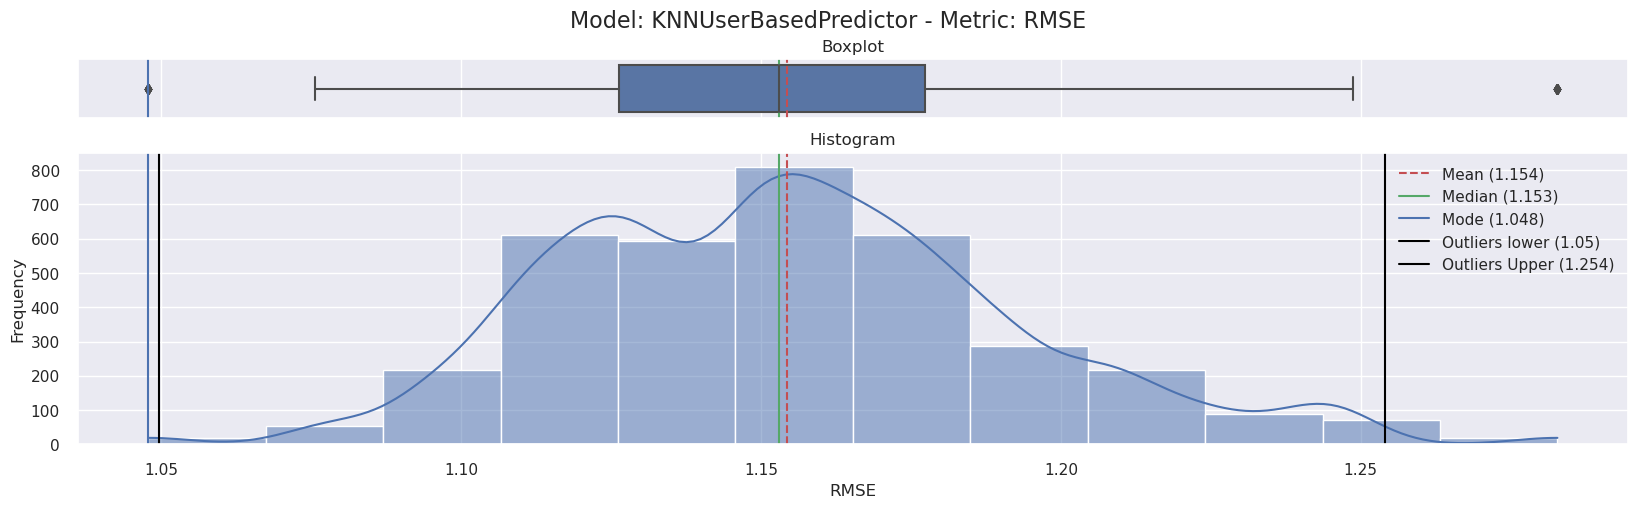

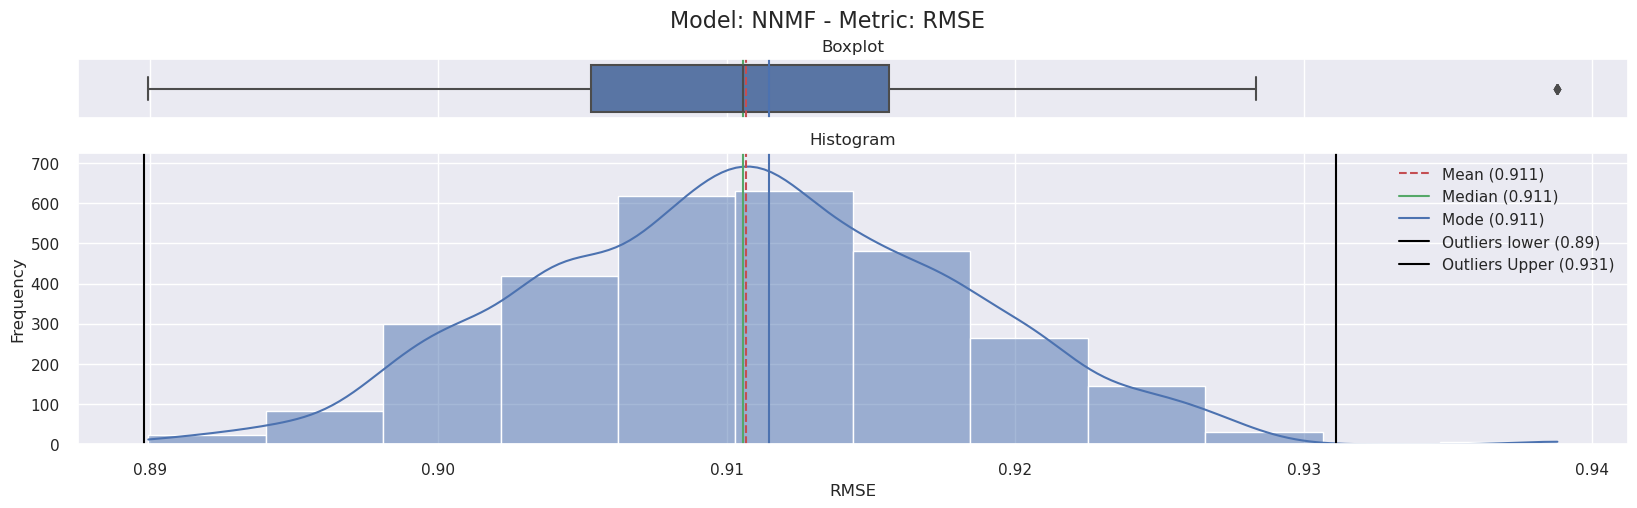

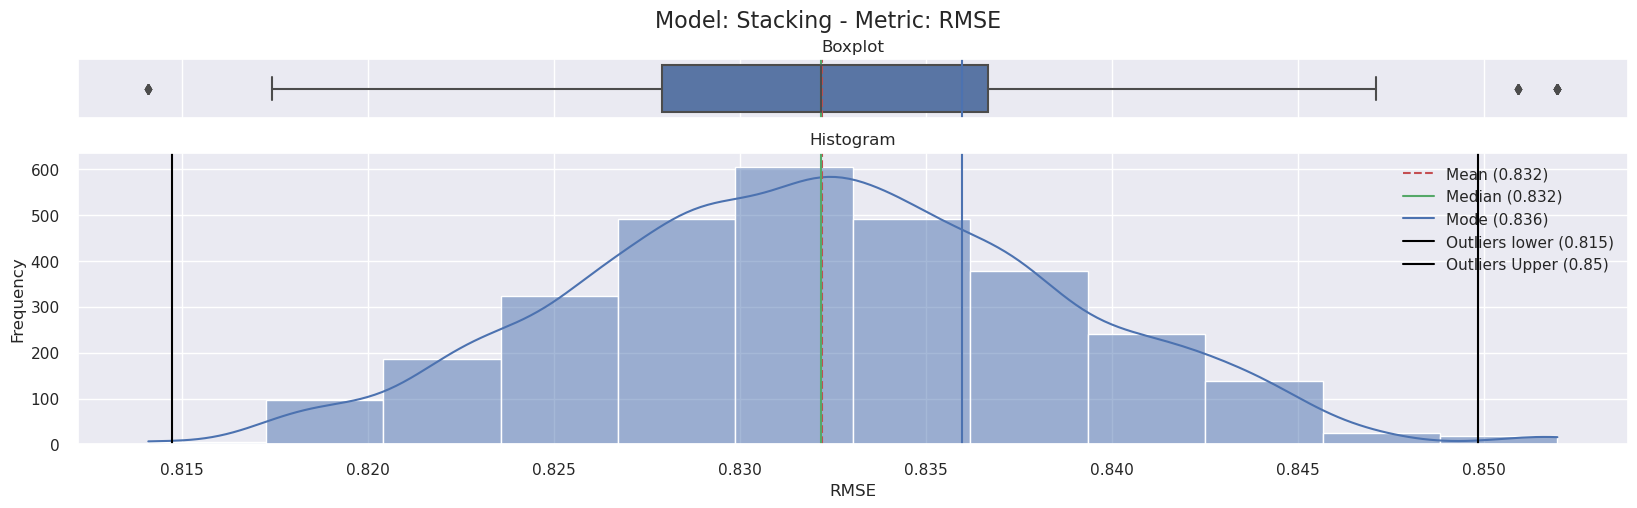

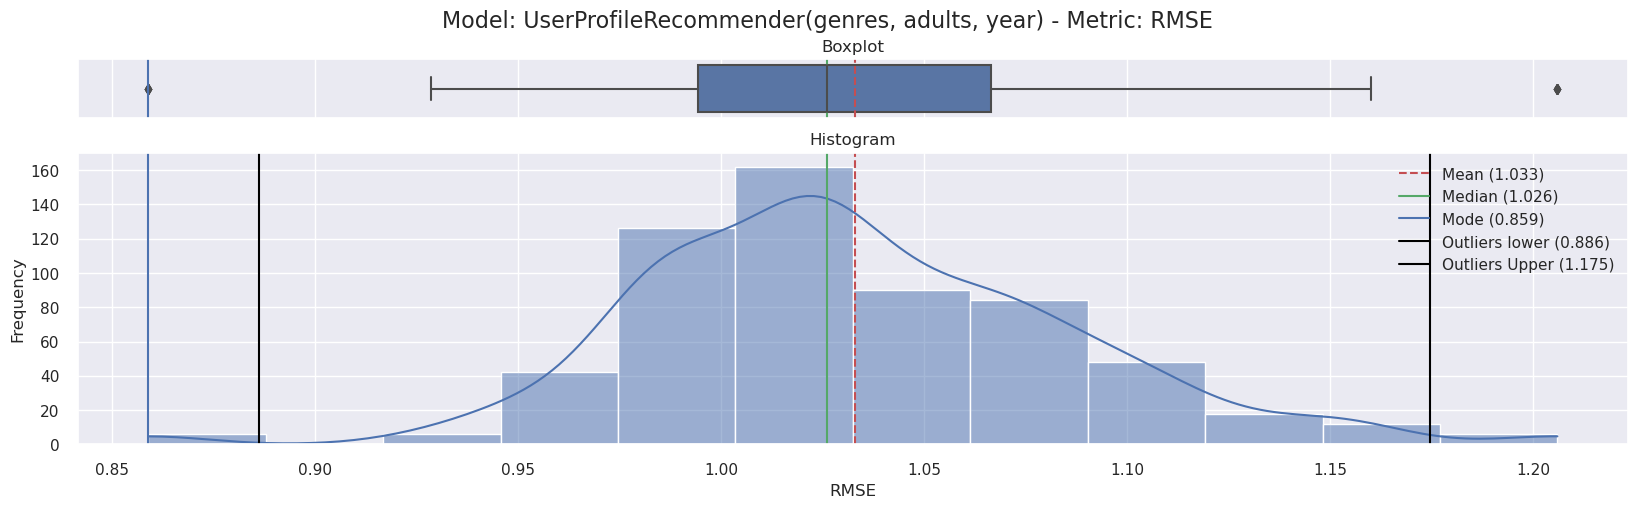

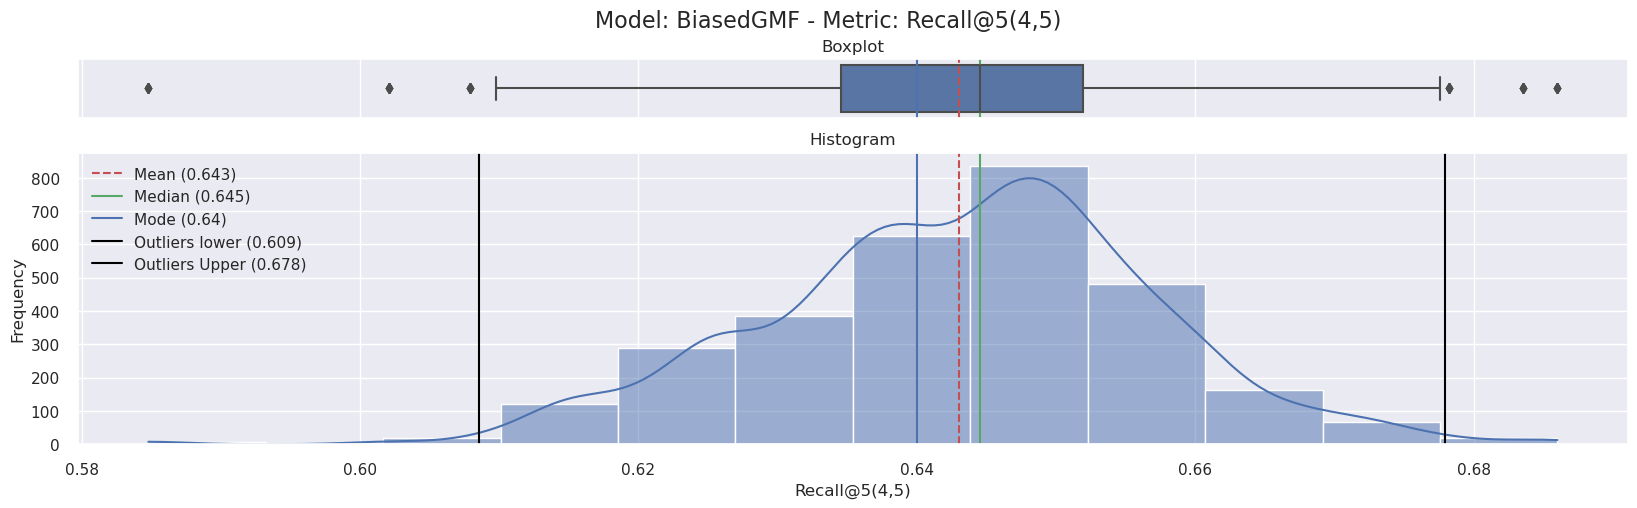

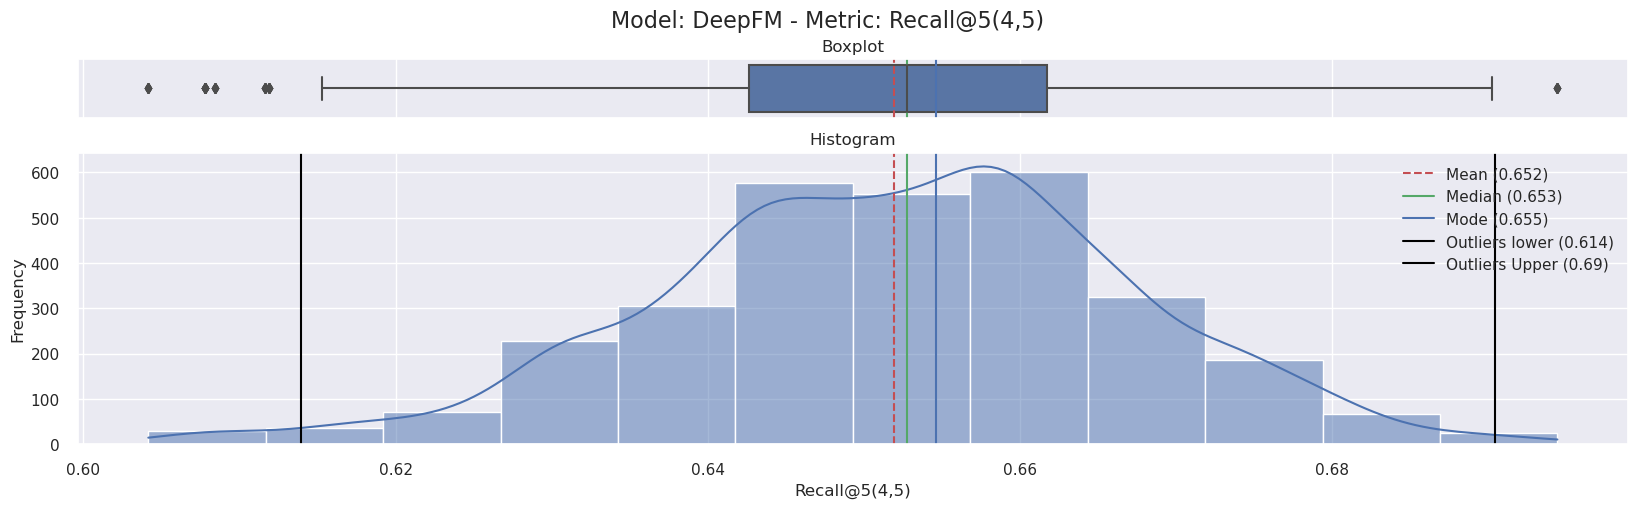

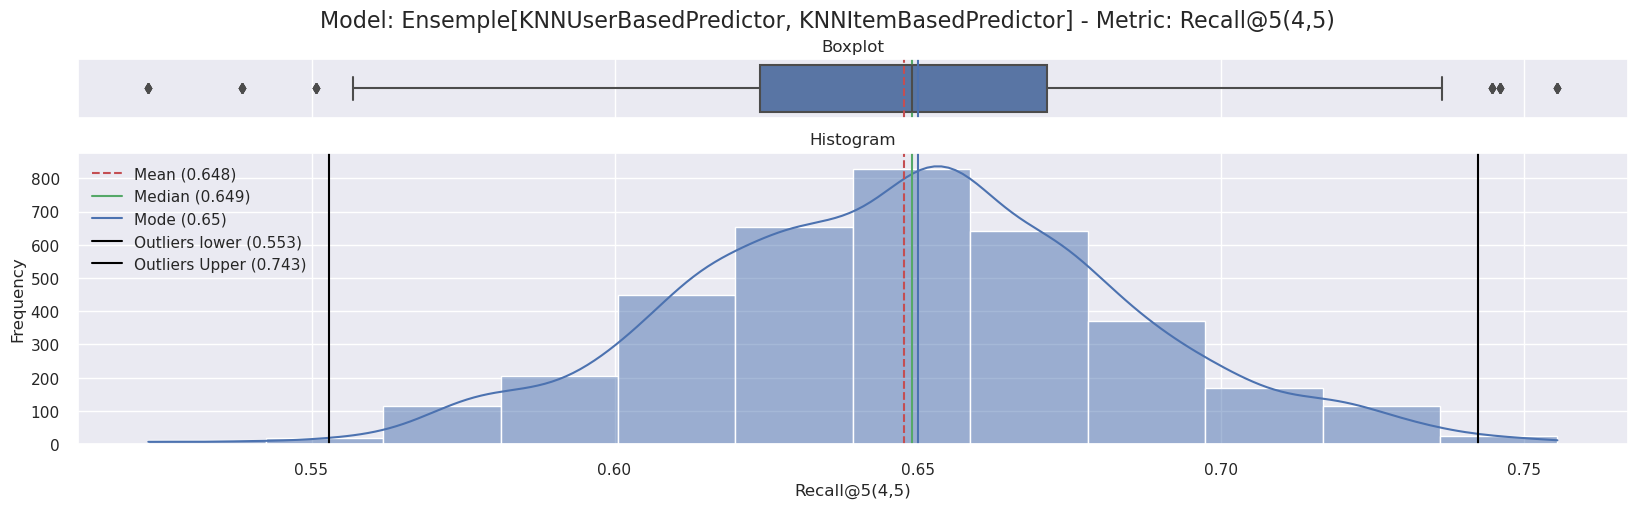

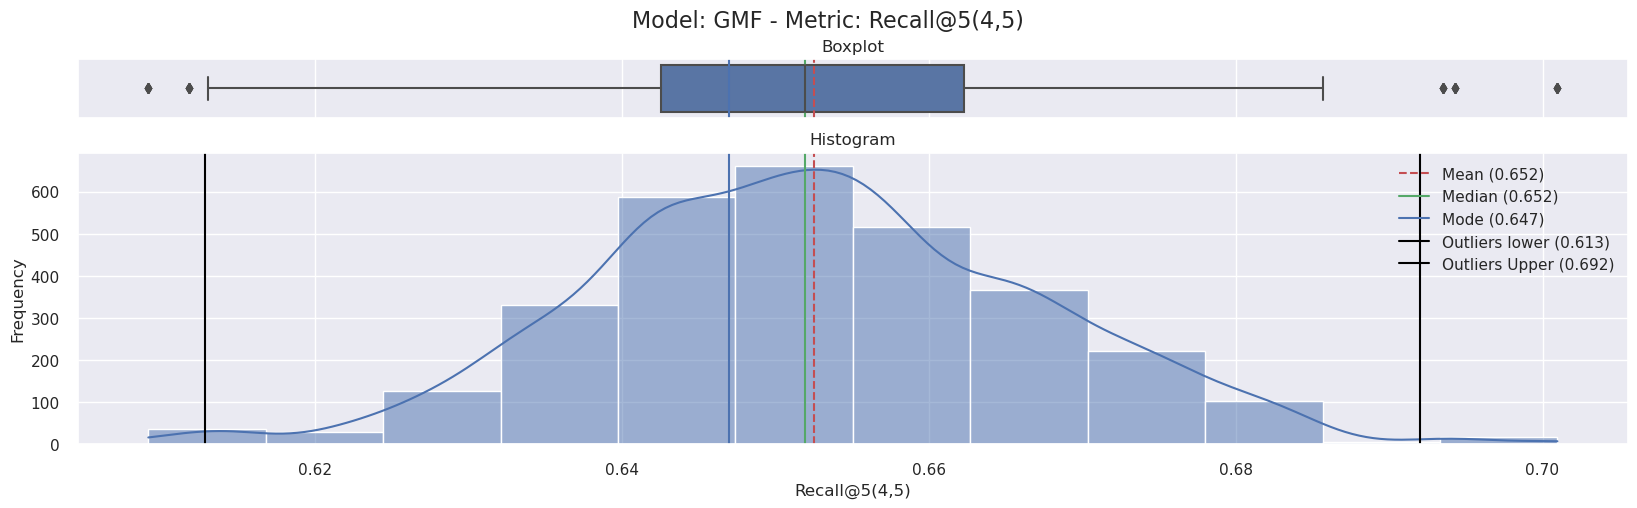

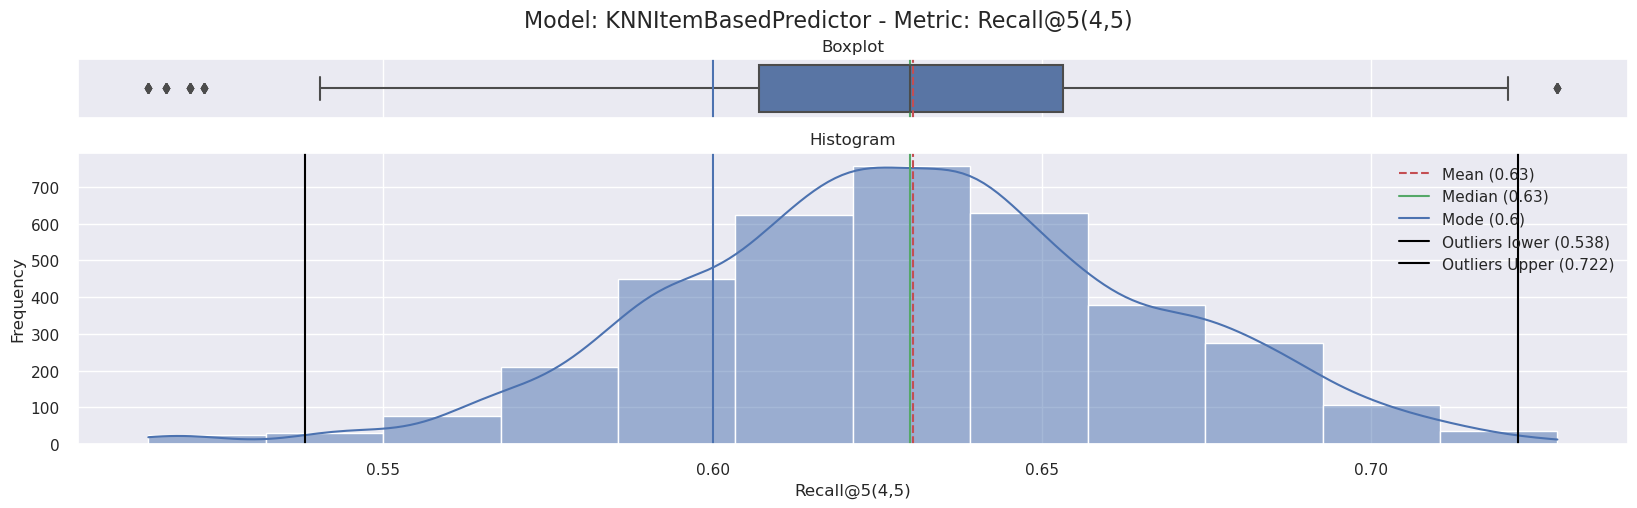

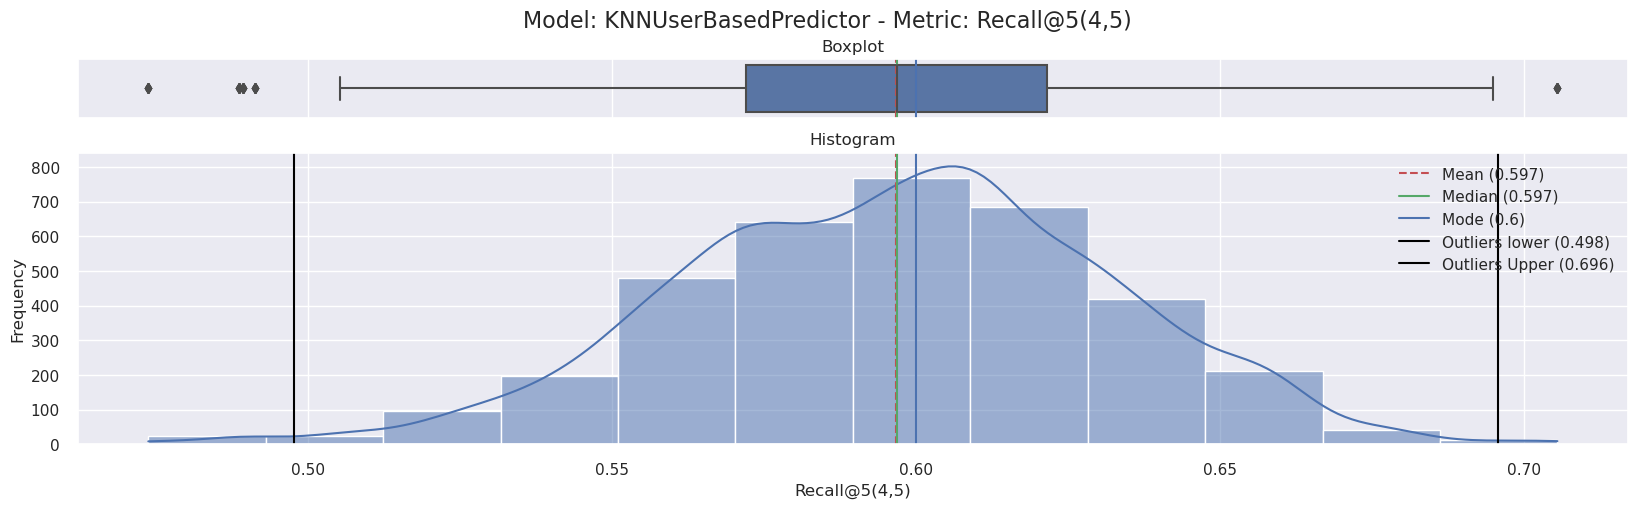

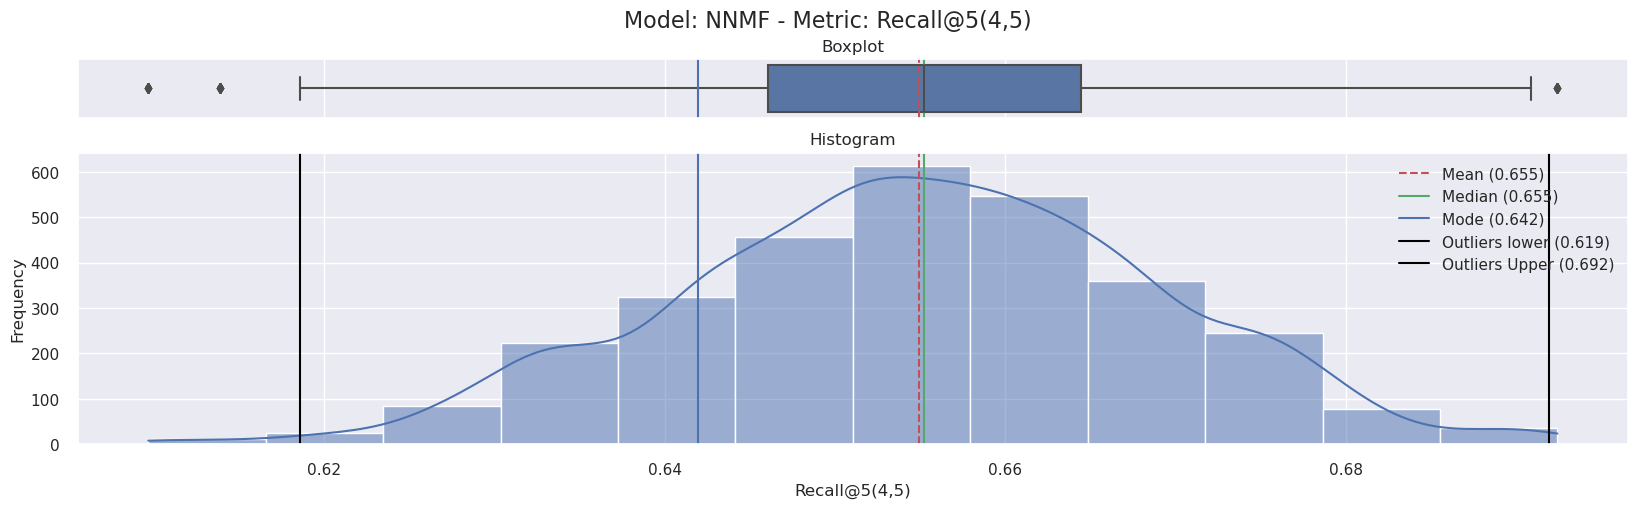

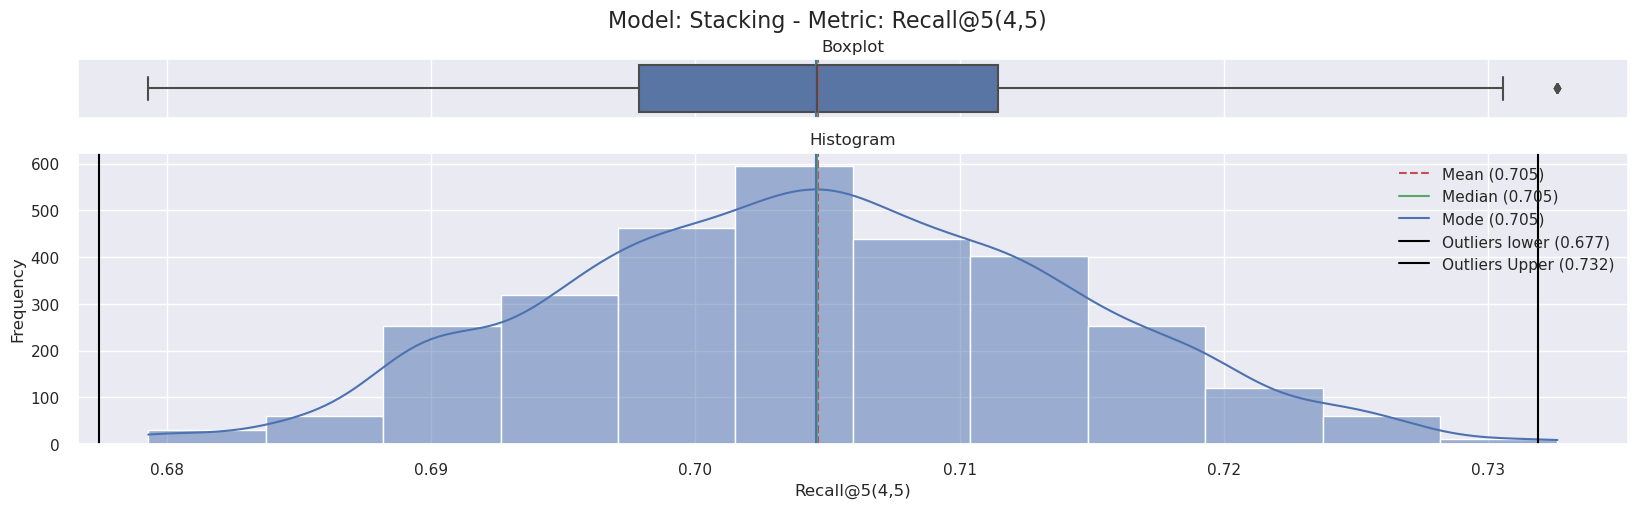

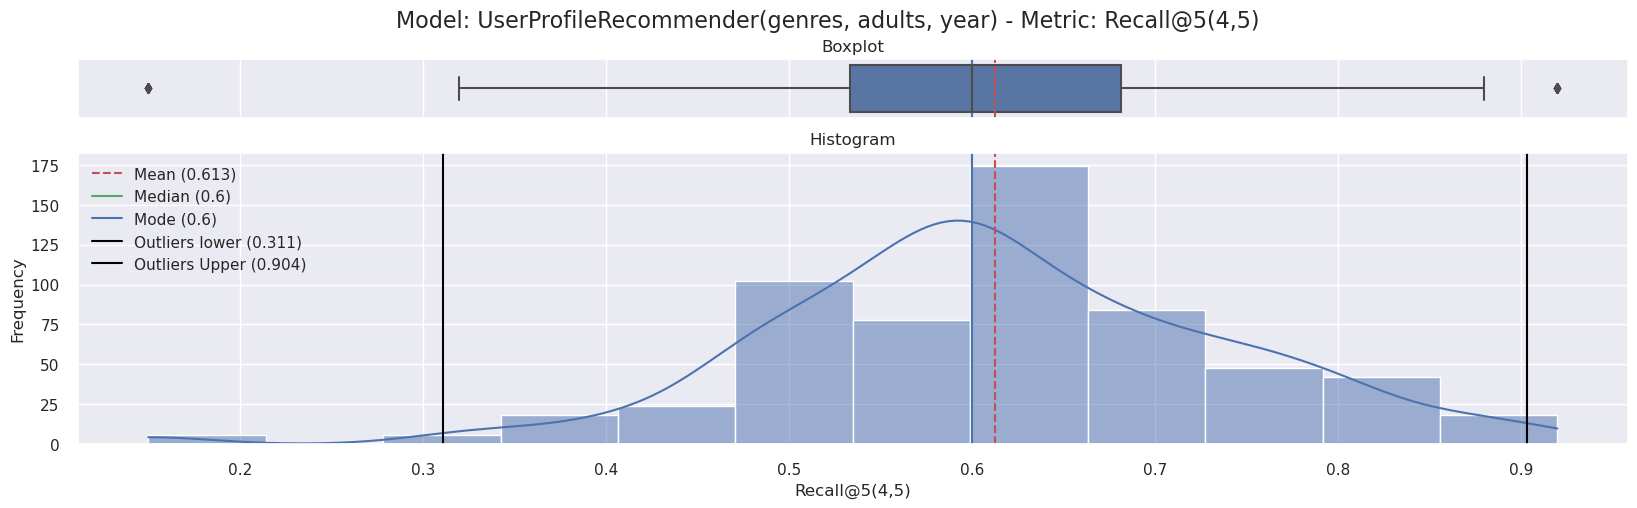

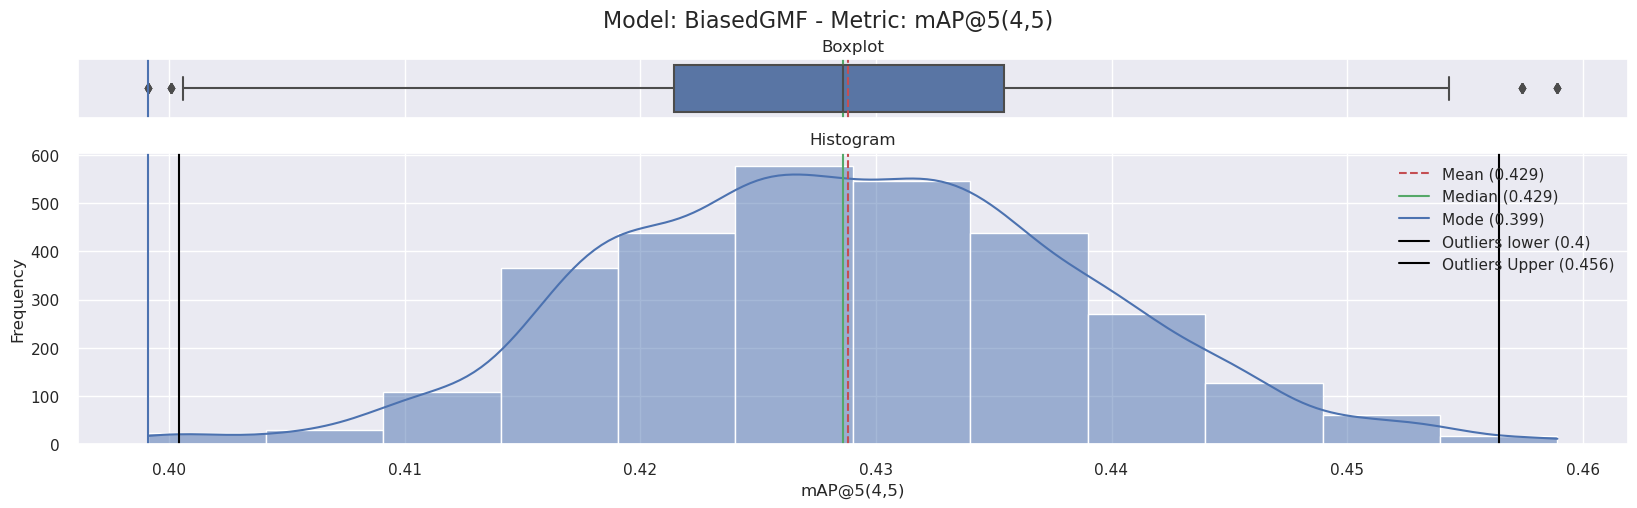

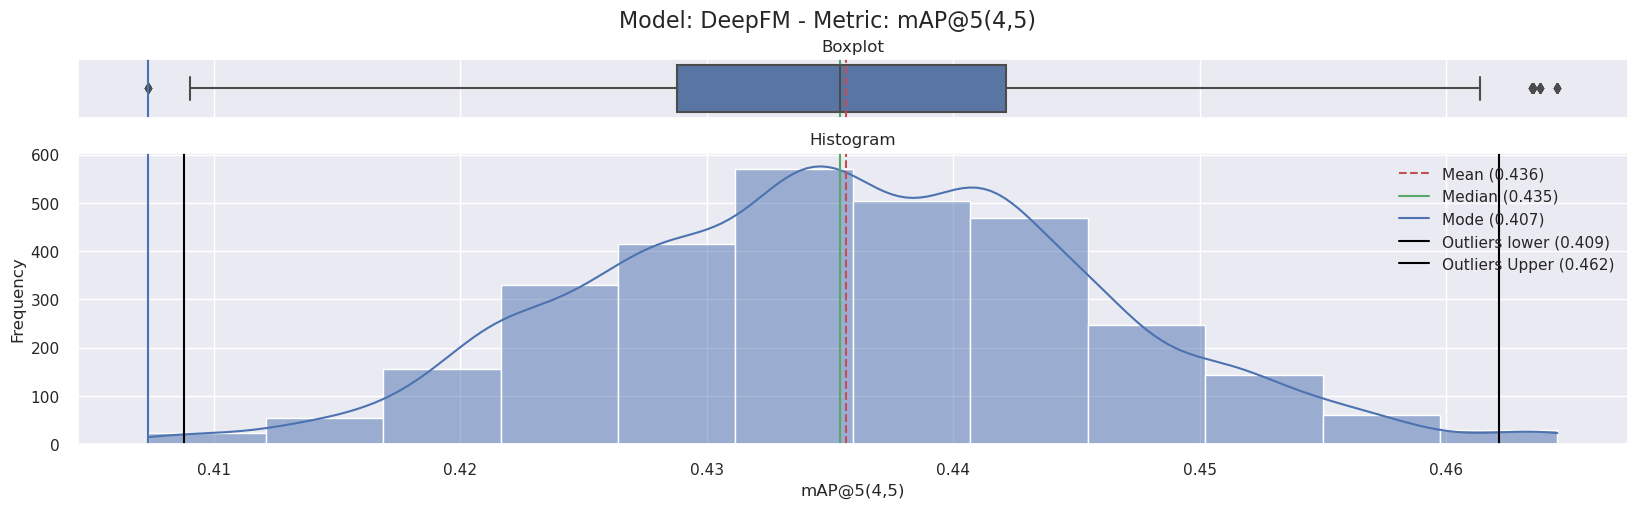

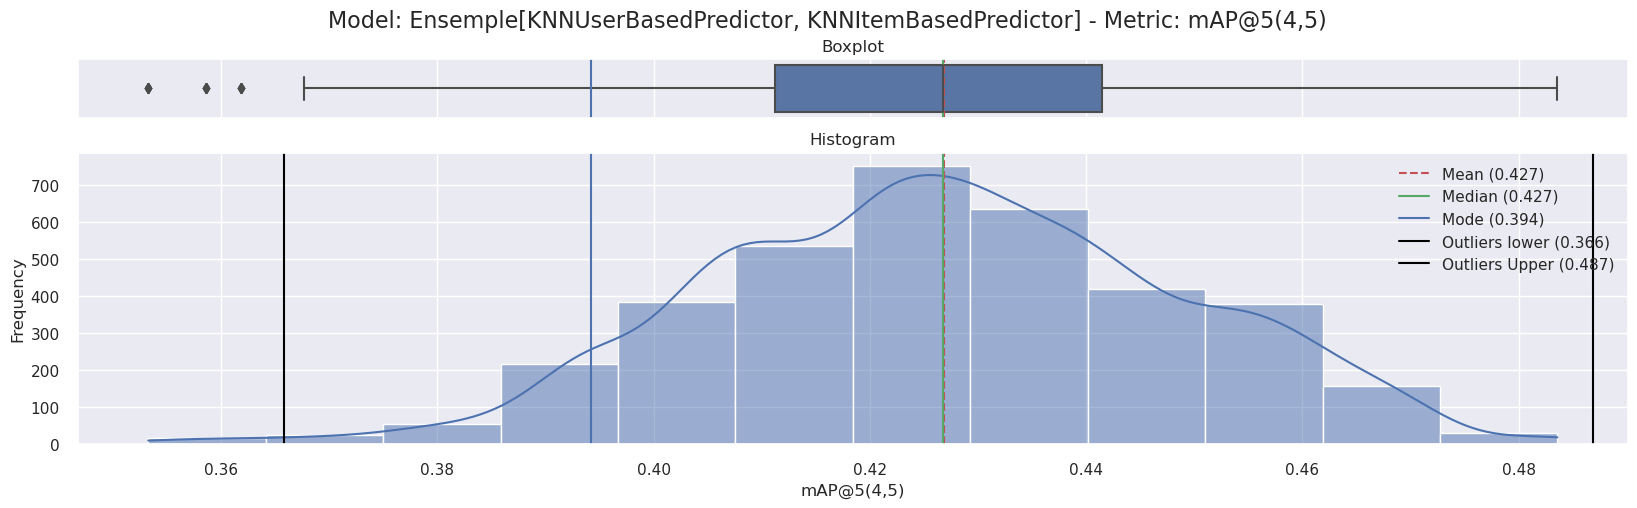

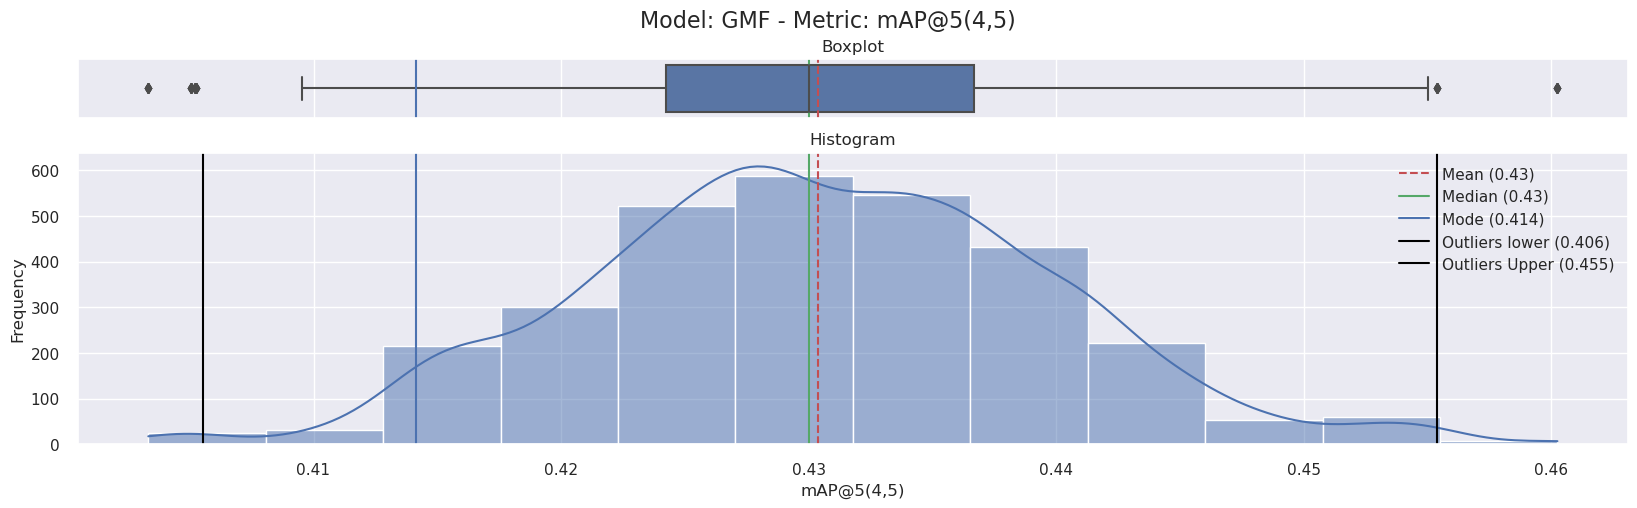

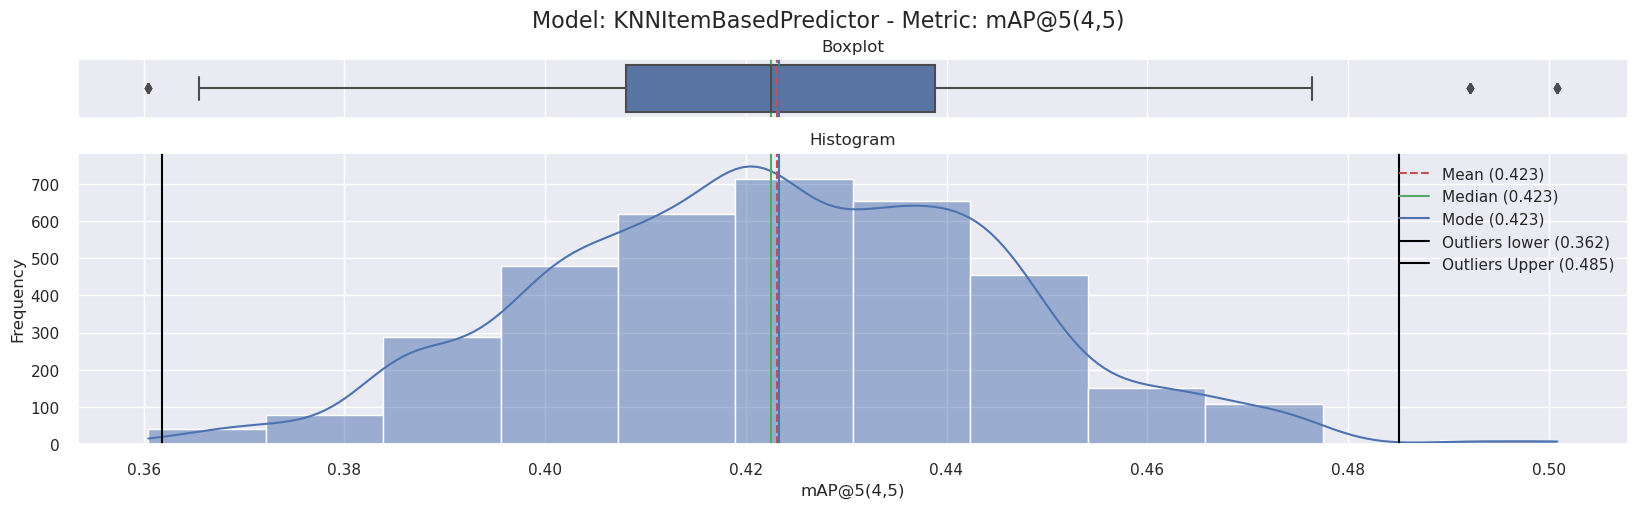

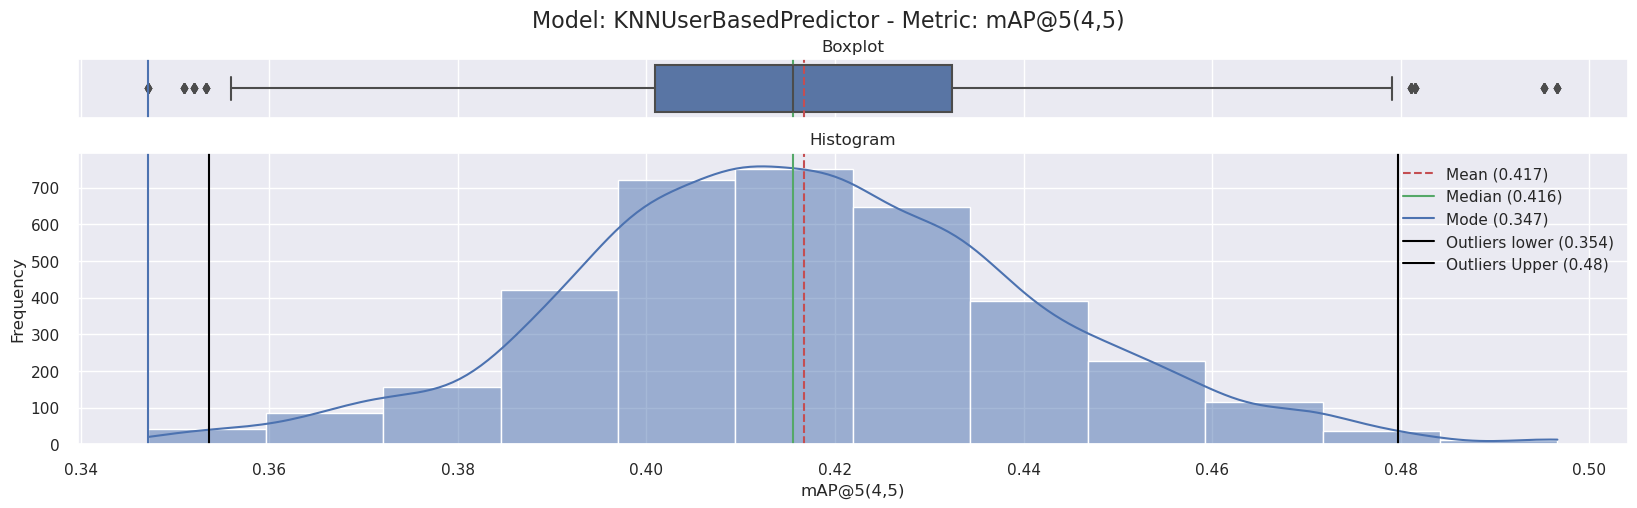

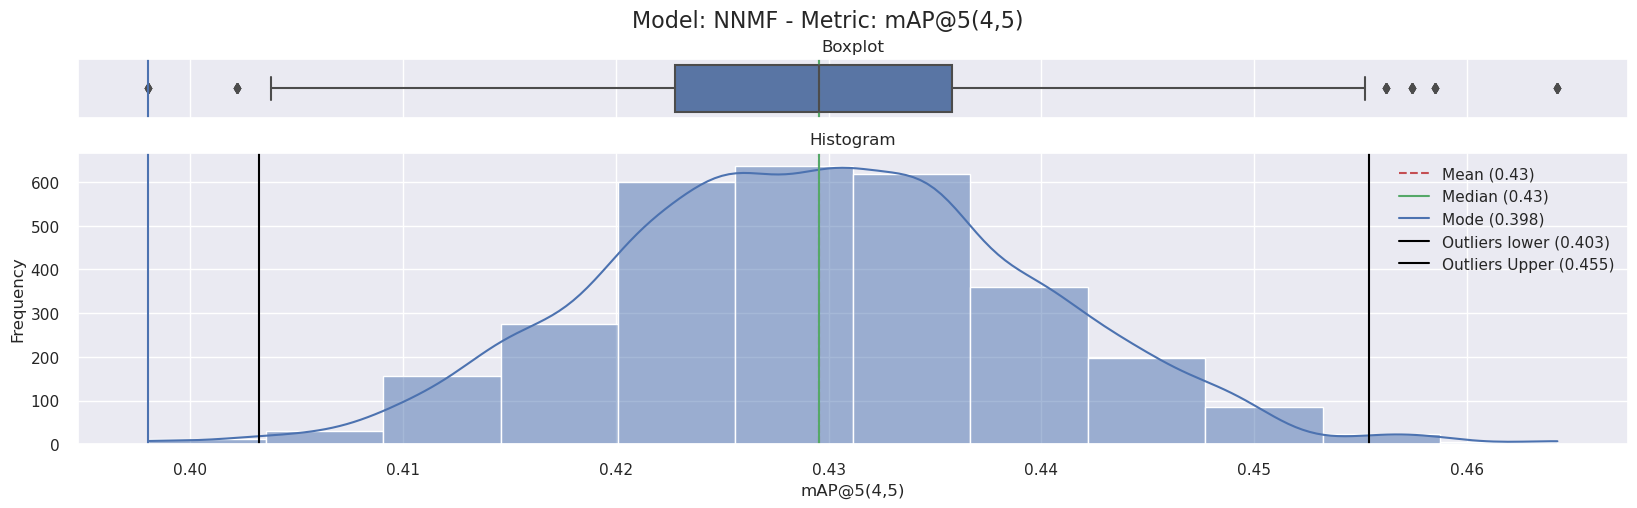

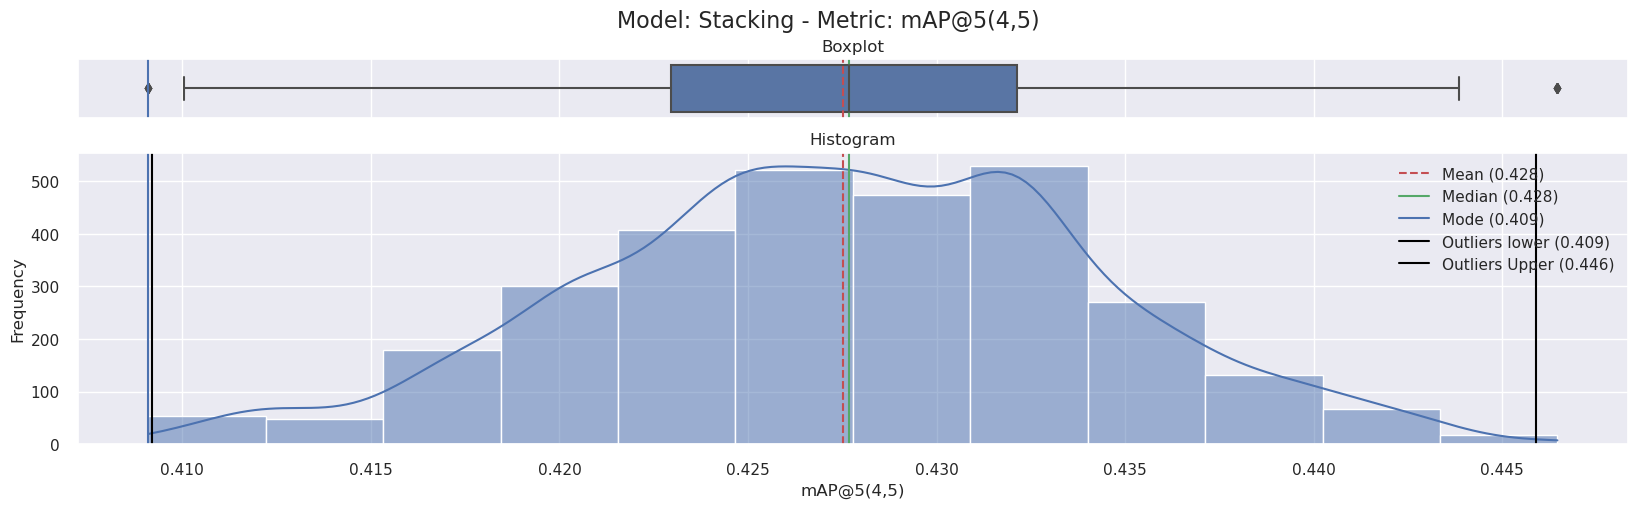

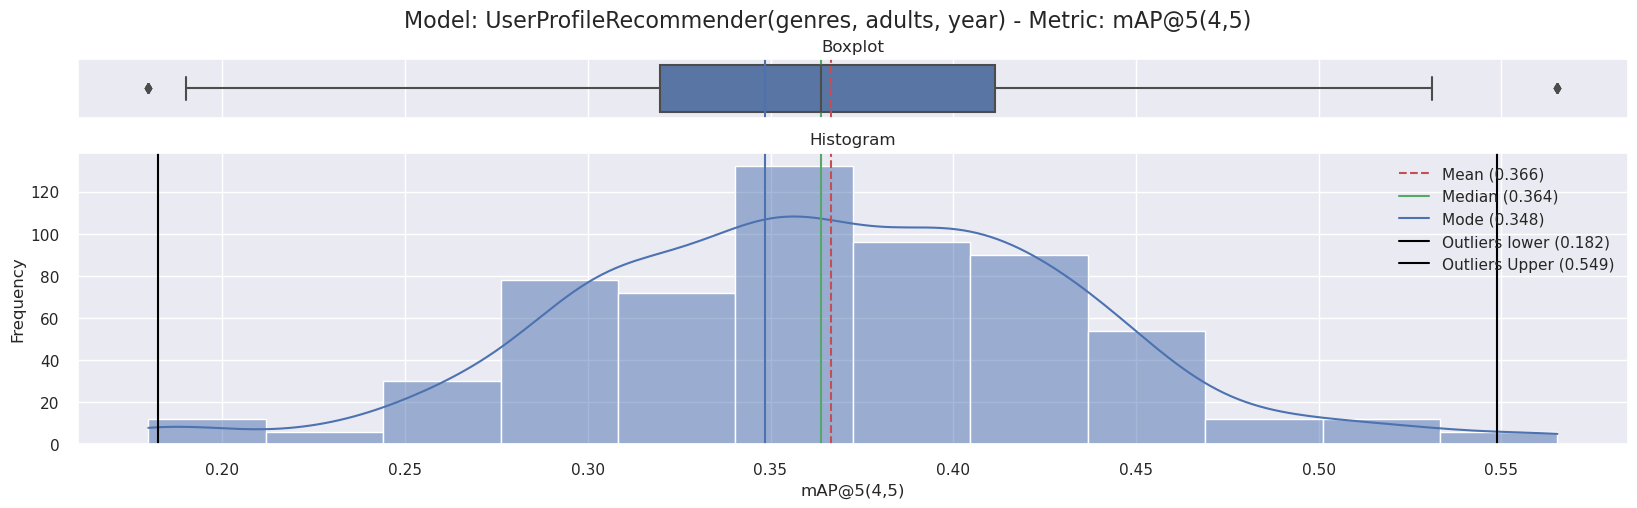

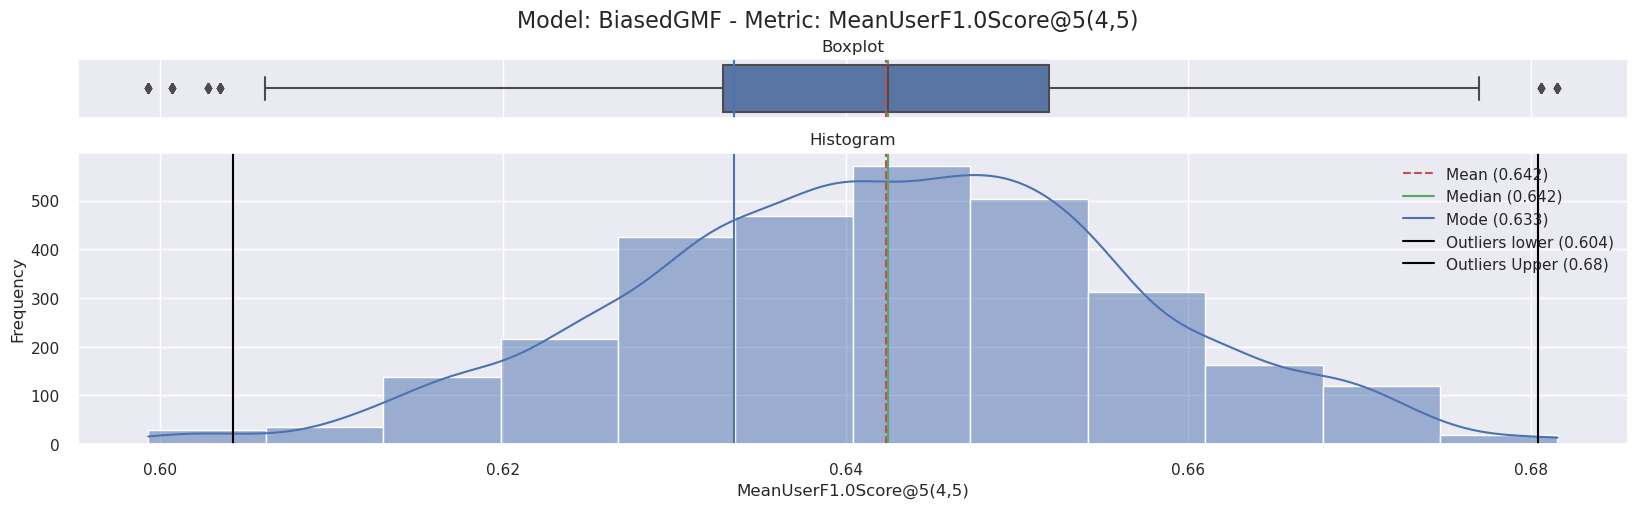

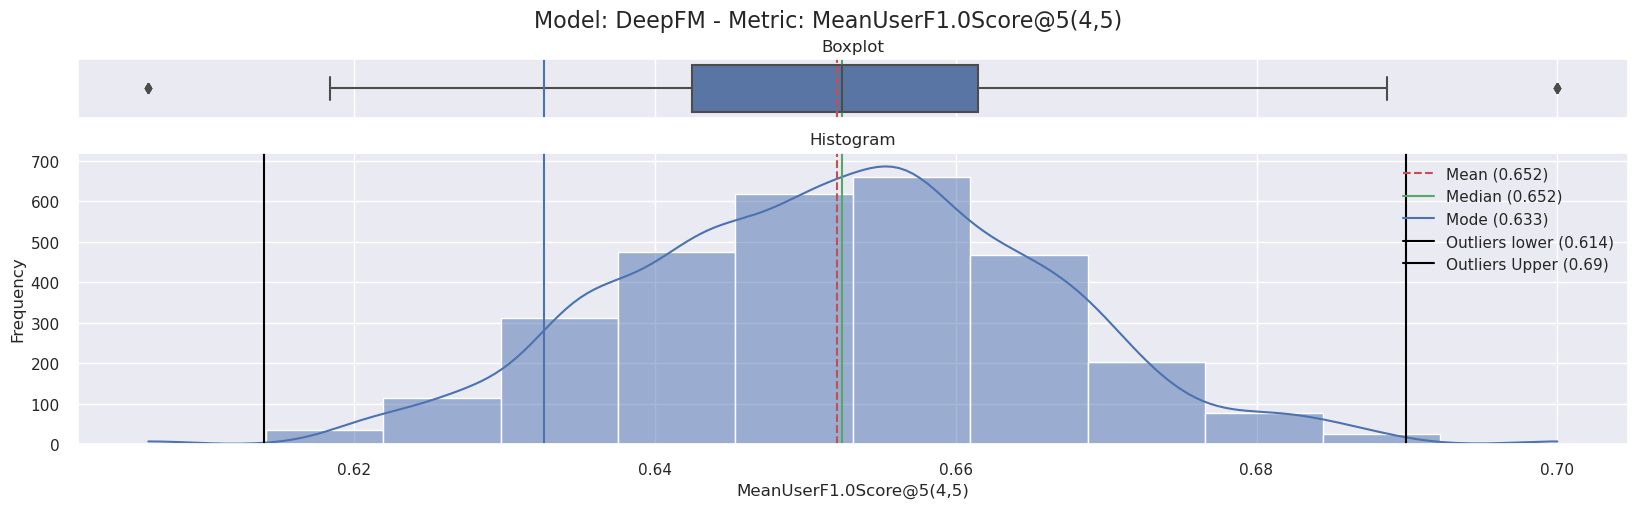

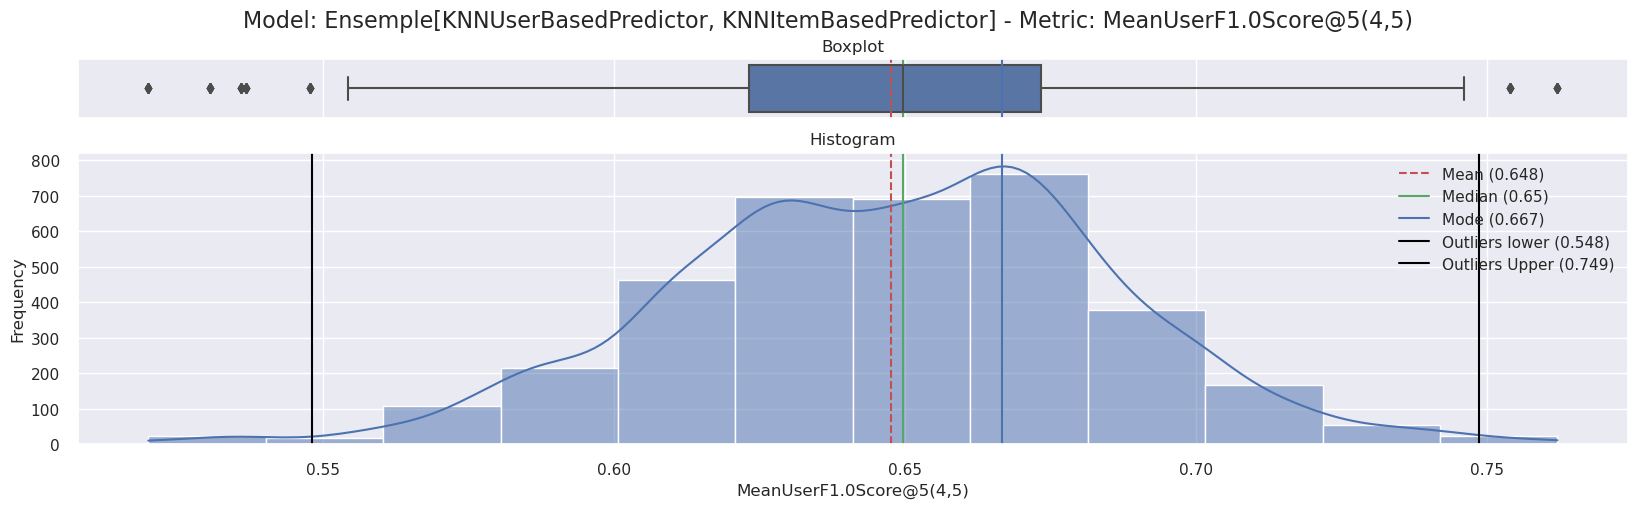

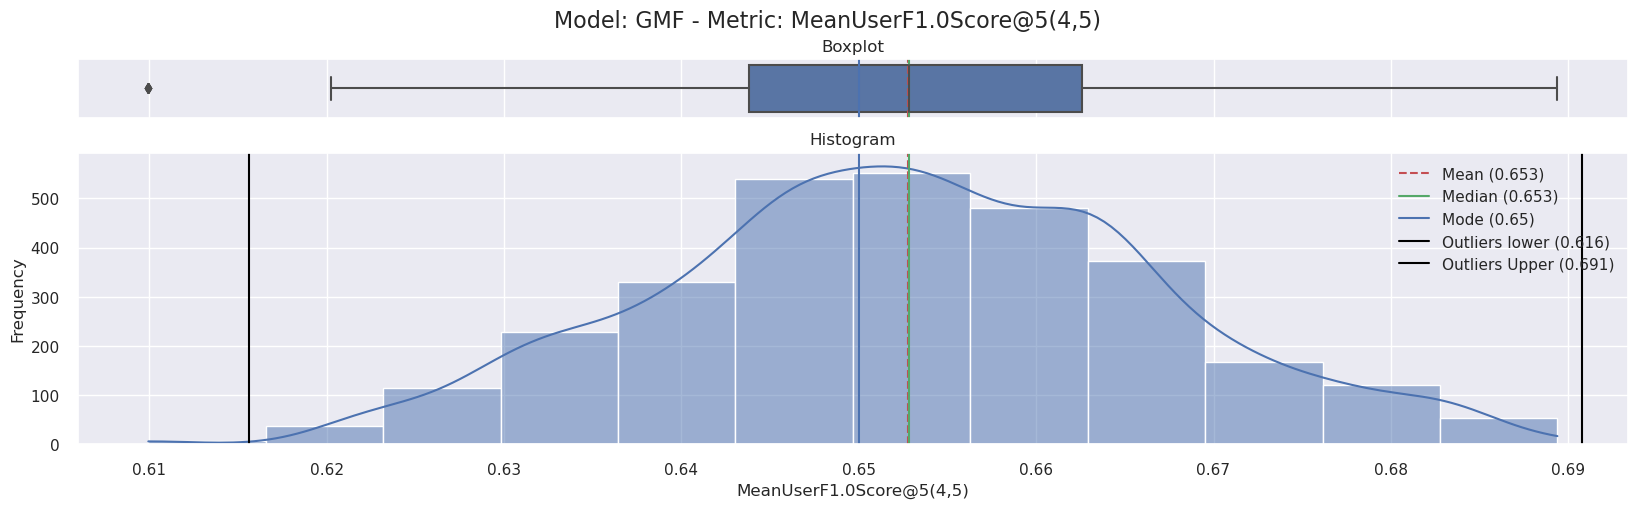

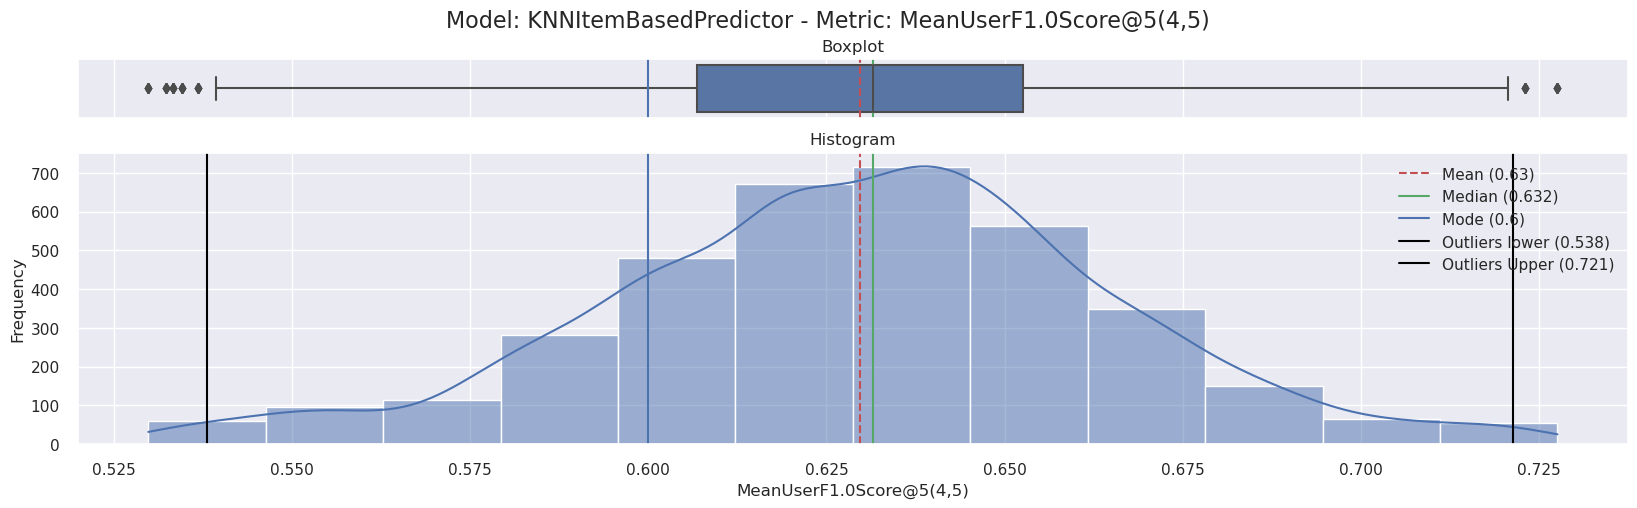

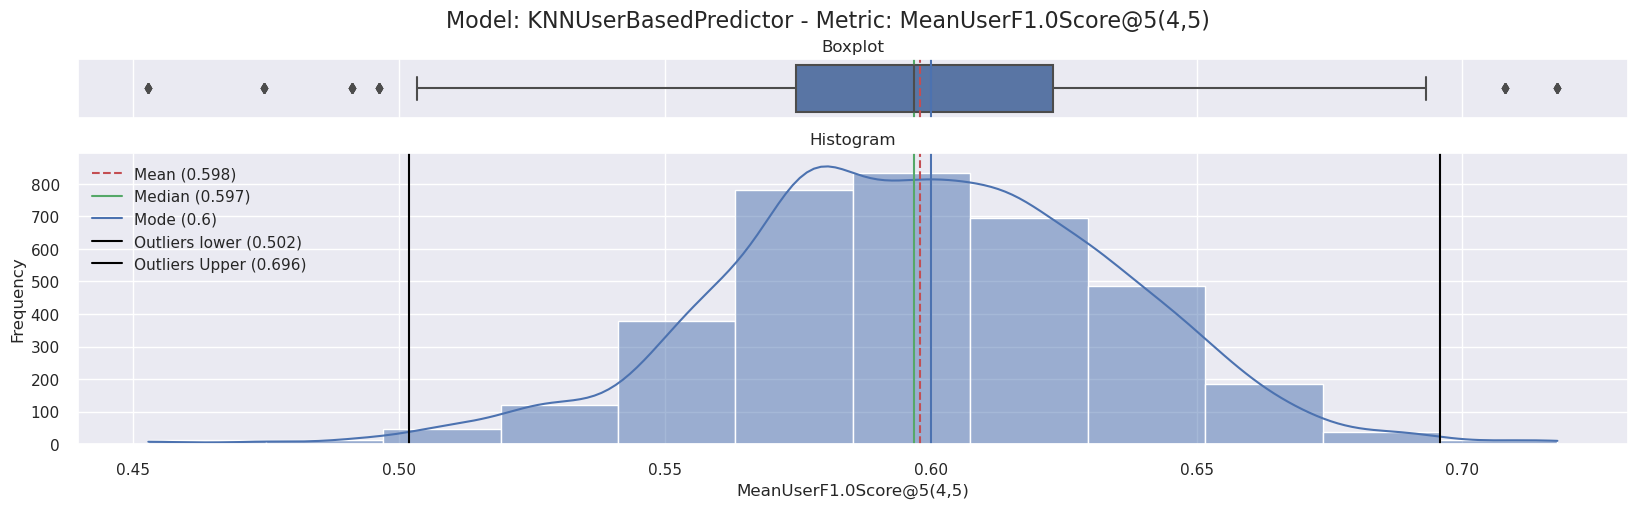

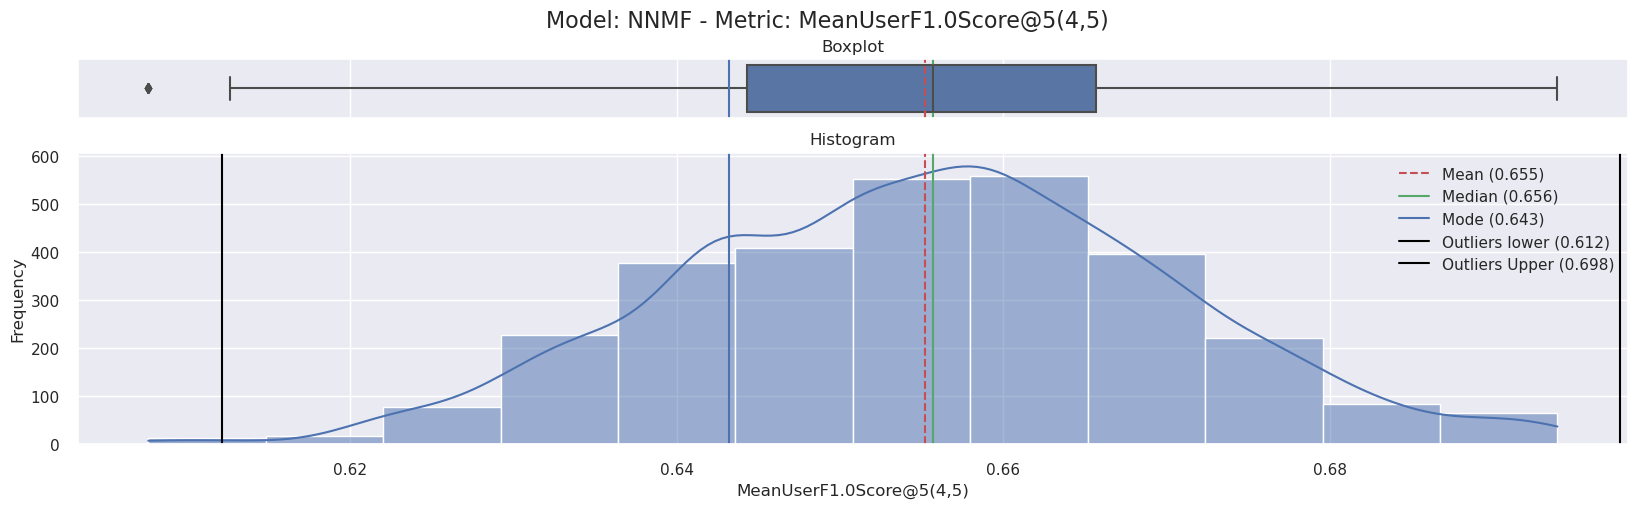

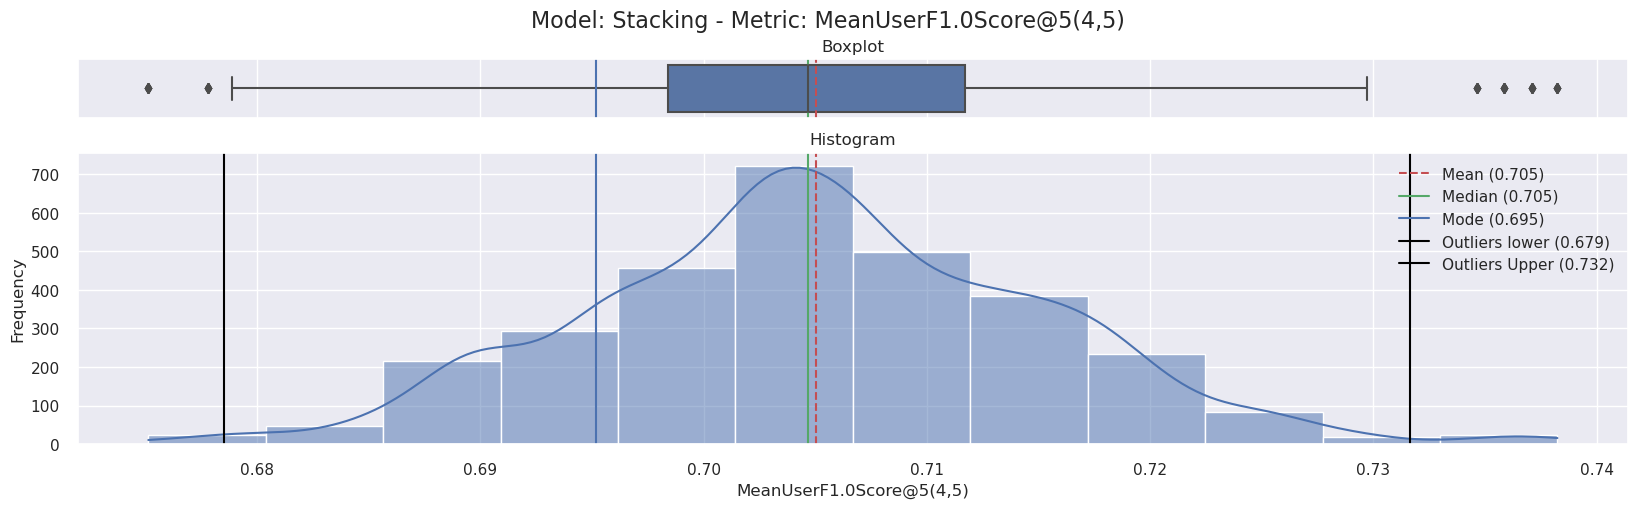

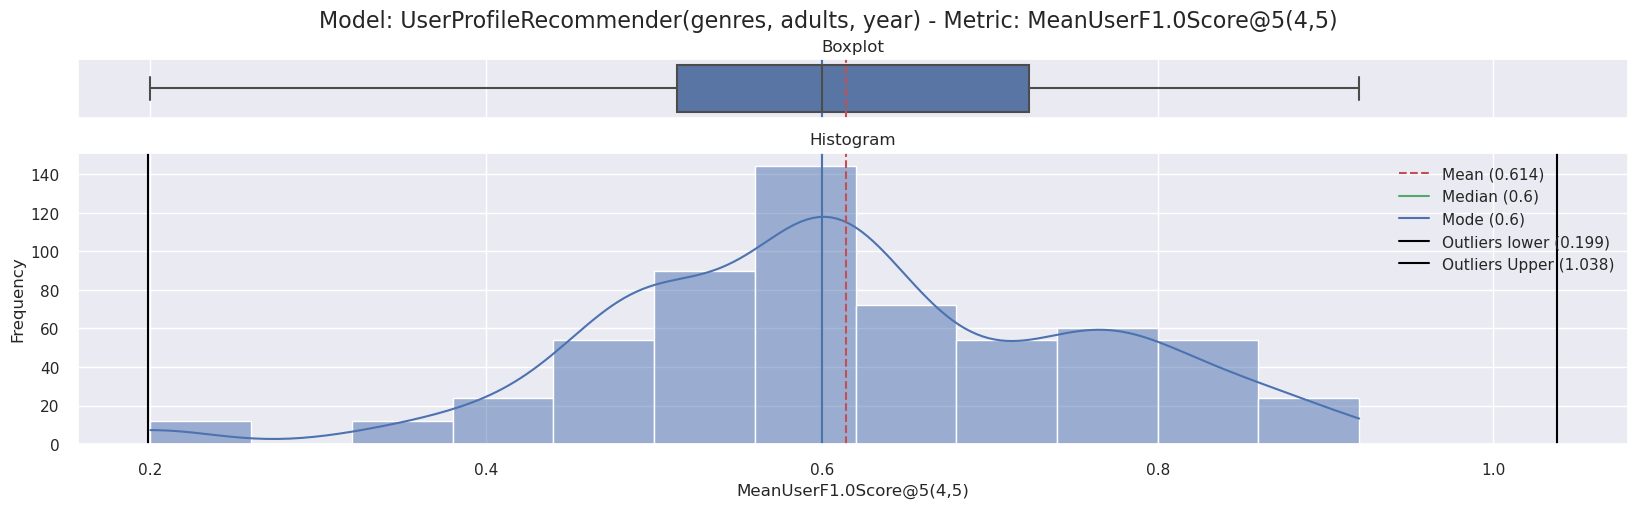

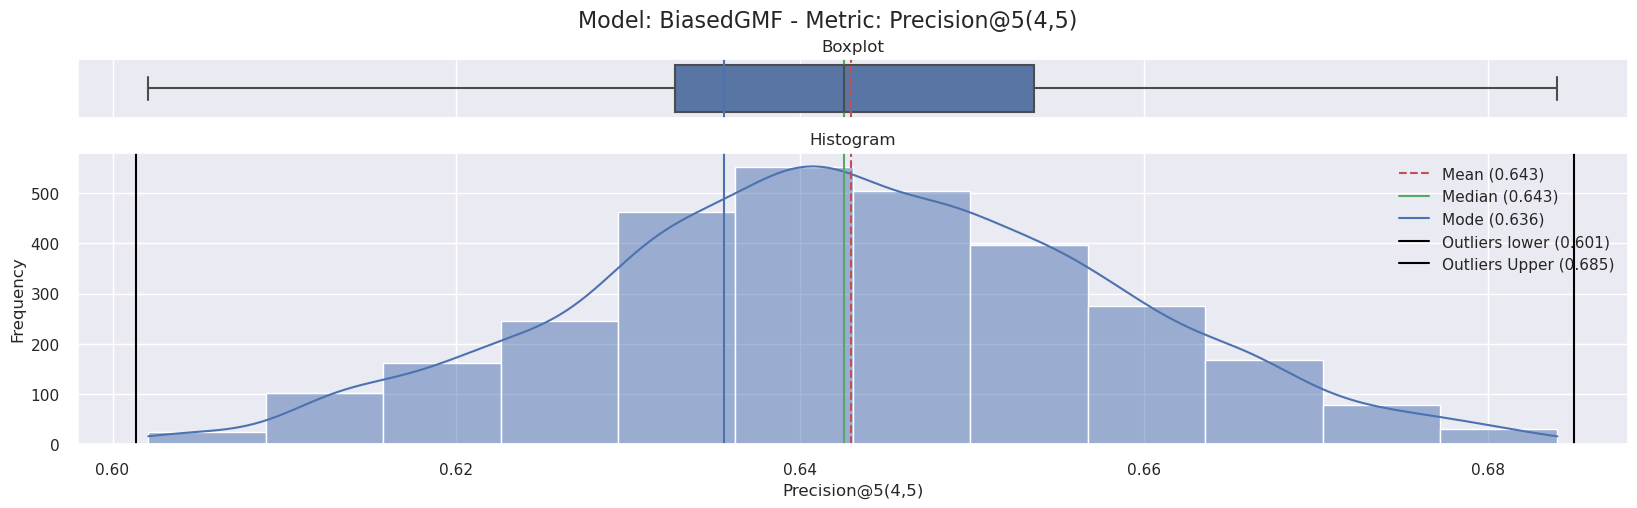

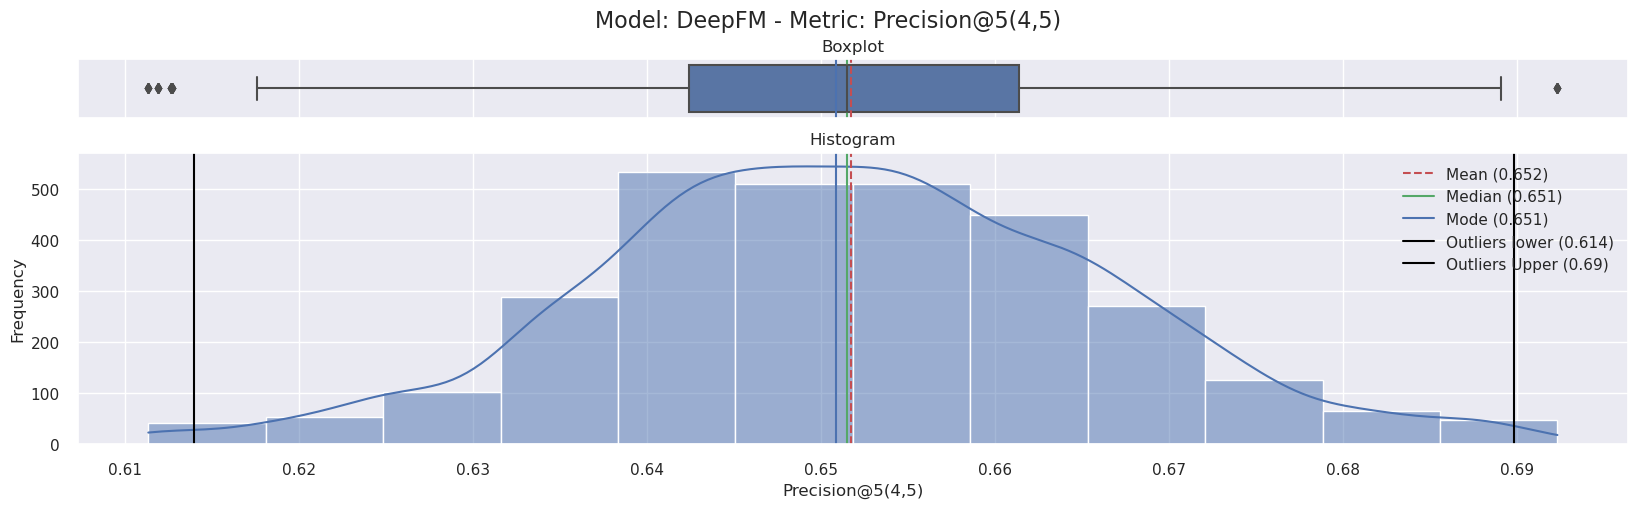

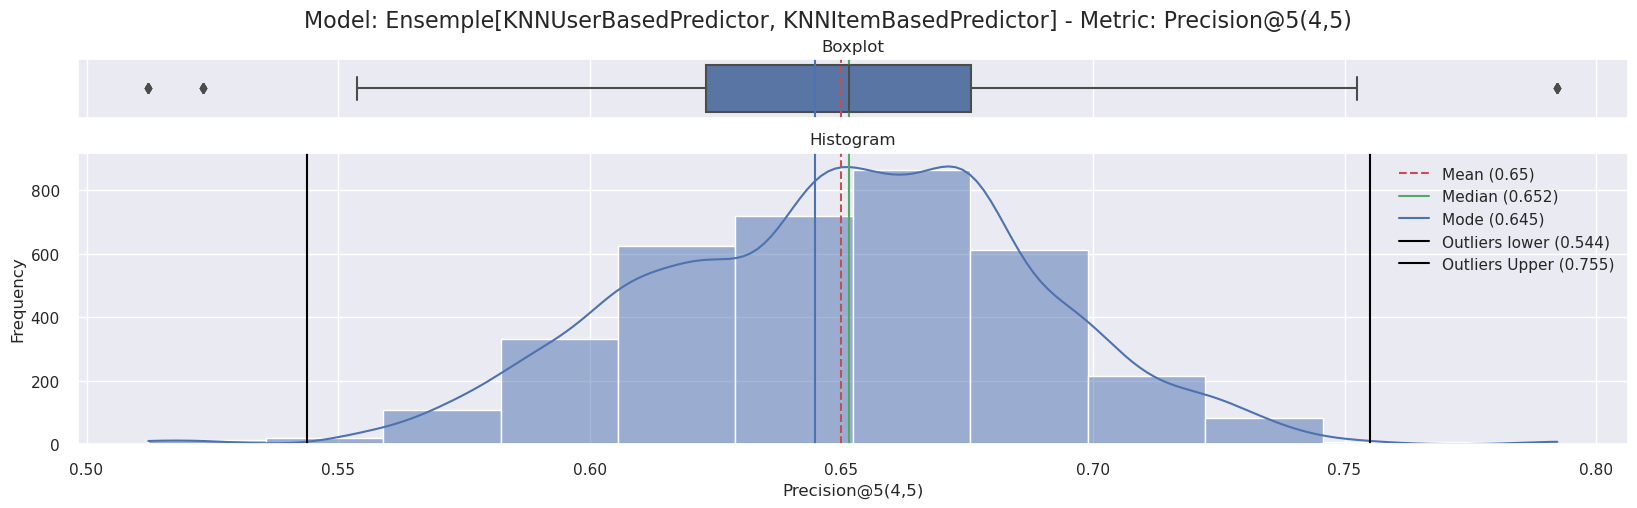

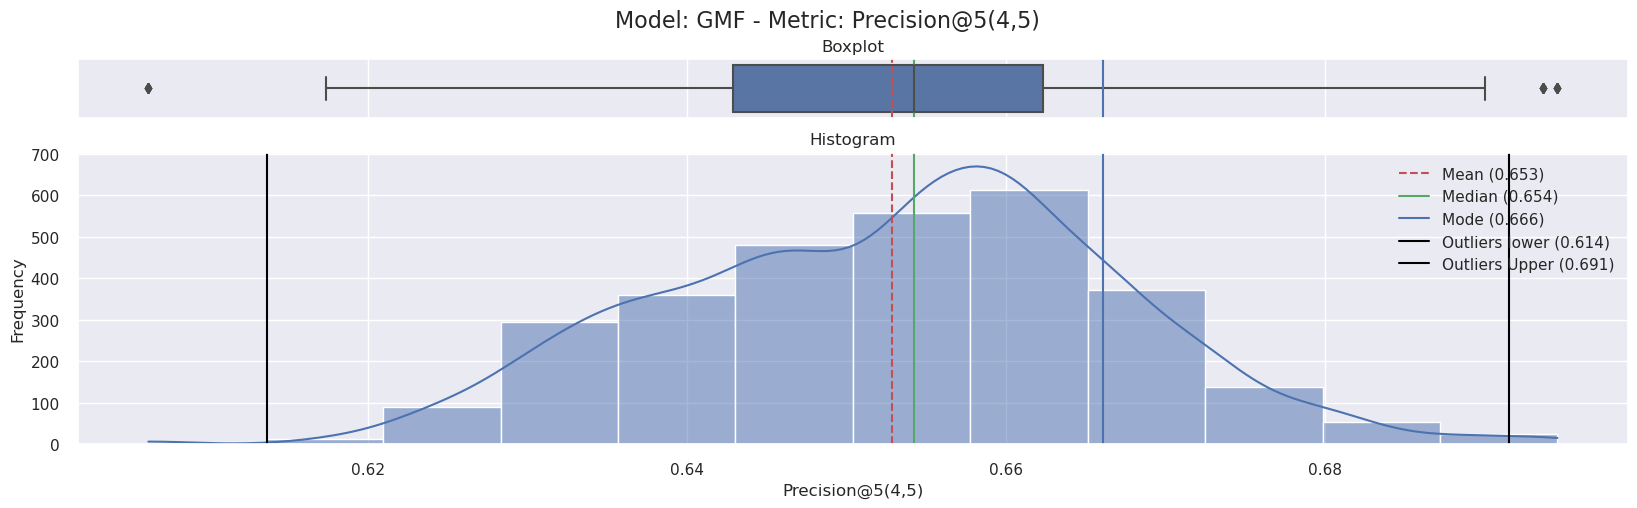

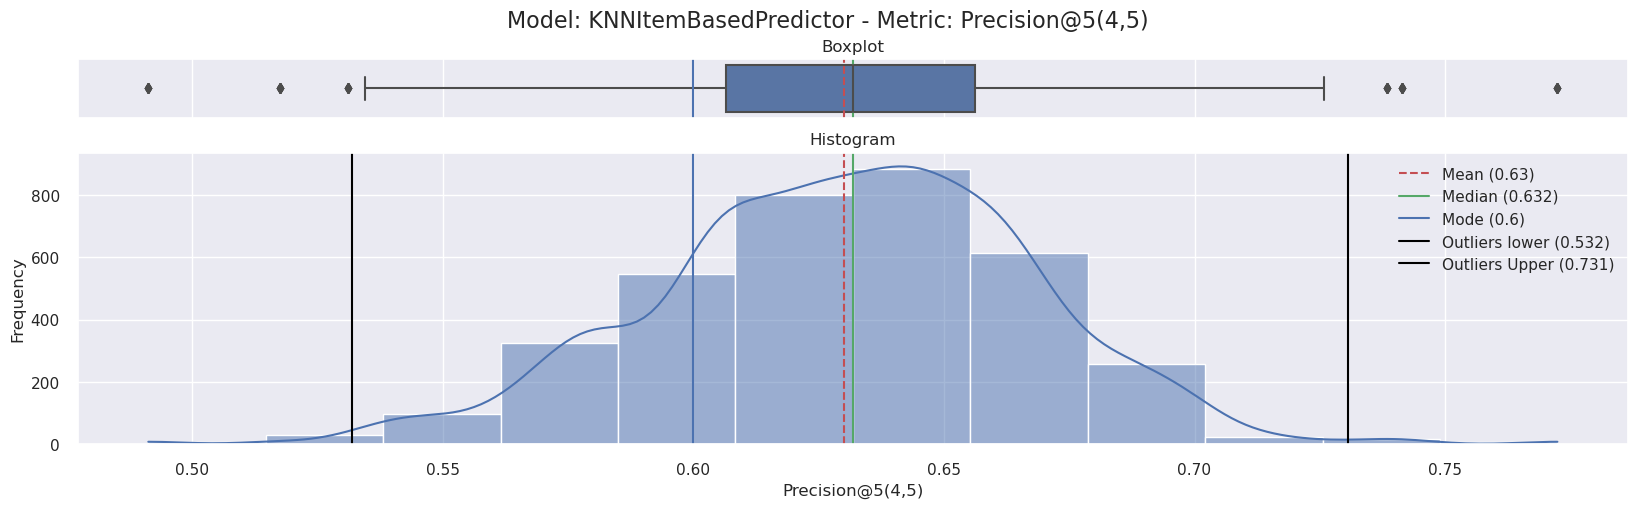

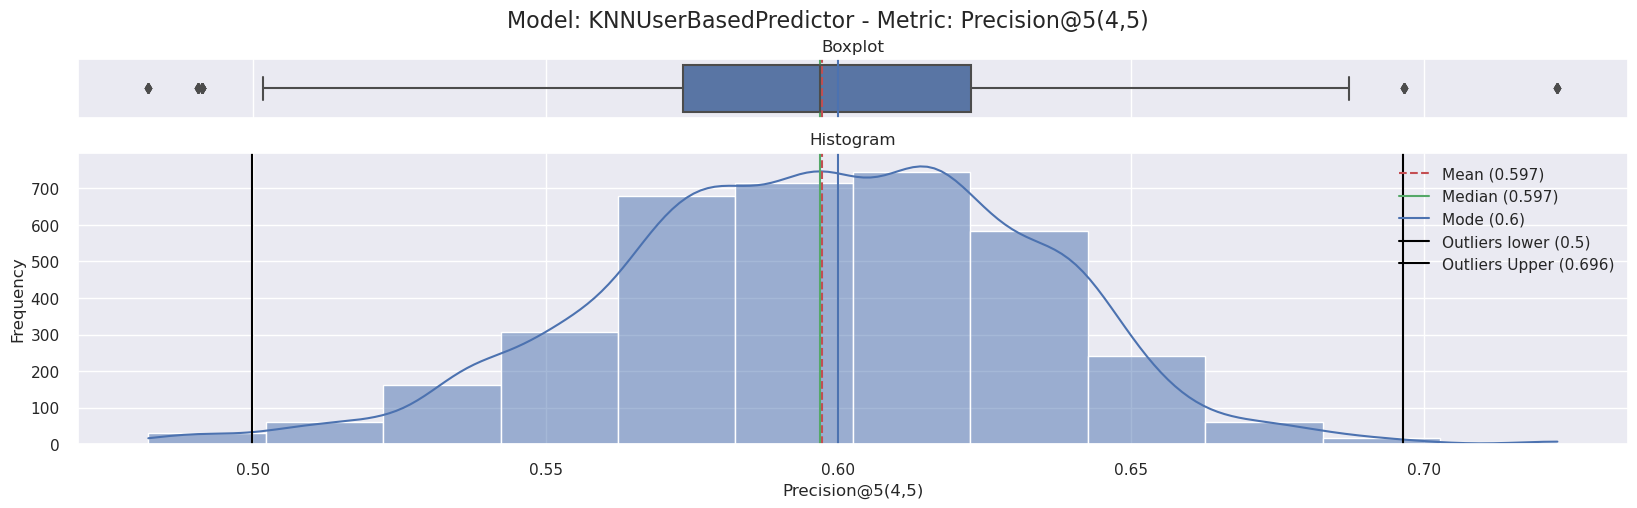

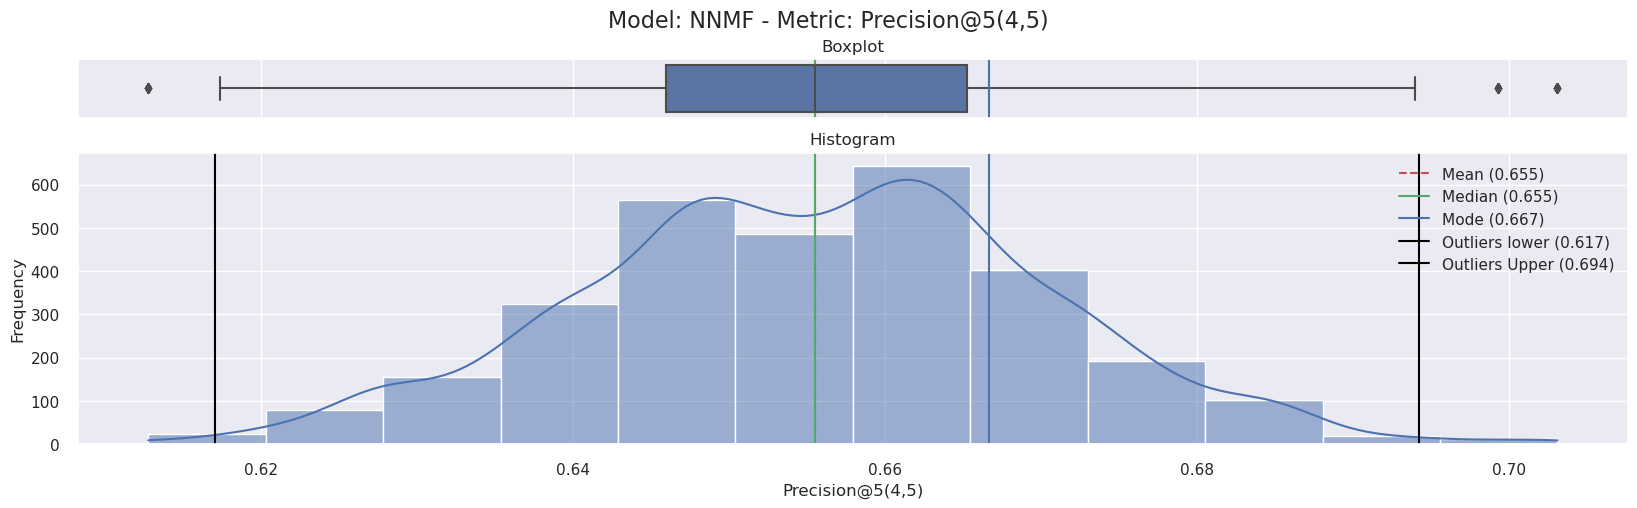

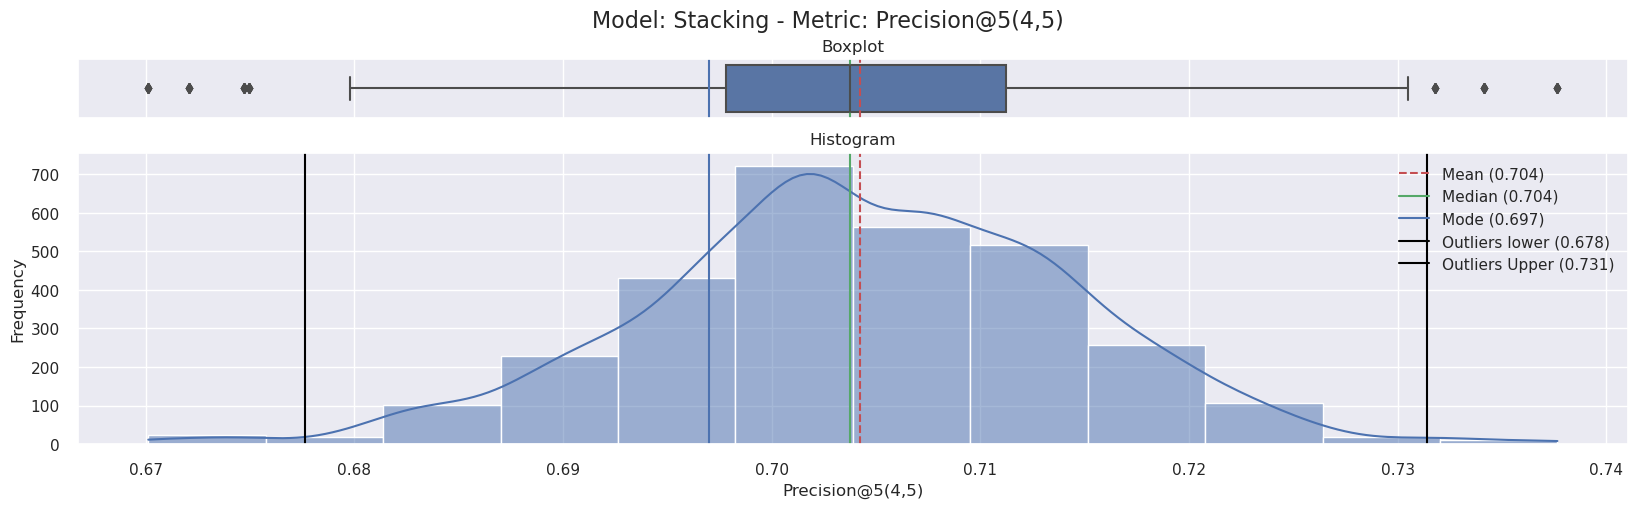

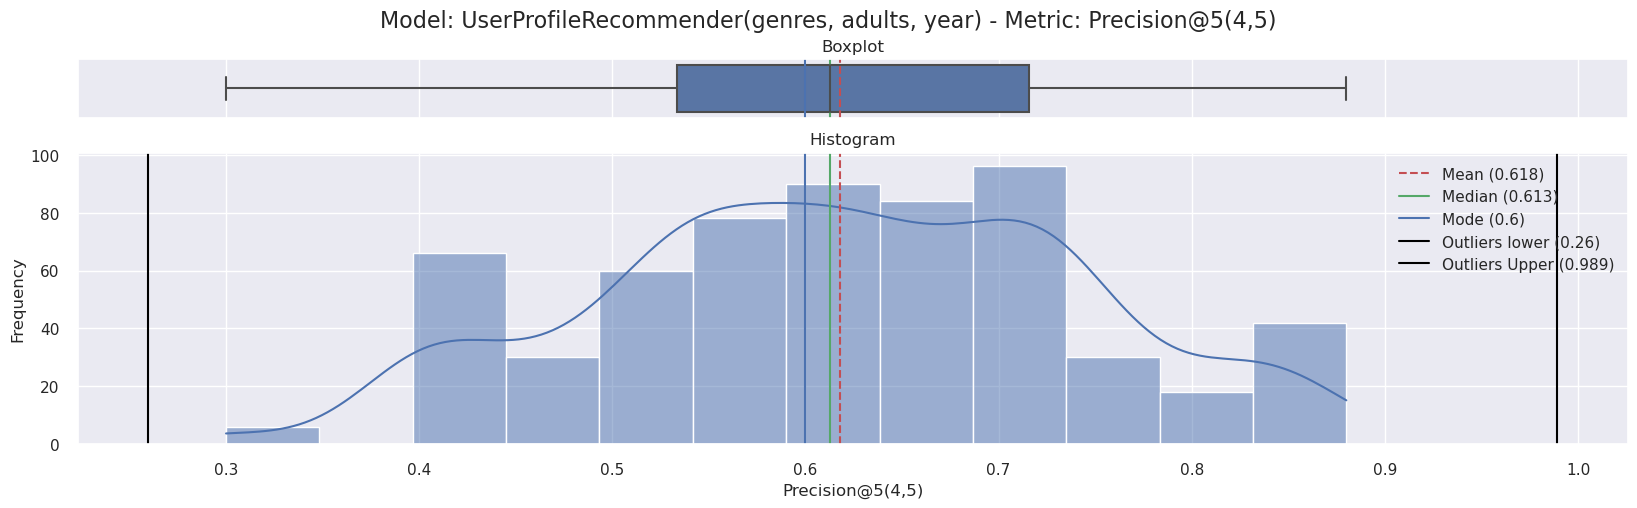

In [11]:
summary.plot(bins=12)